## ERA5 Monthly Averaged Data Analysis 

In [1]:
#%matplotlib inline 
# this line is required for the plots to appear in the Jupyter cells, rather than launching the matplotlib GUI
%matplotlib notebook
#this allows interactive view but you need to be in classic rather than CoCalc Jupyter notebook for this to work

import matplotlib

import numpy as np

import matplotlib.pyplot as plt


# Let printing work the same in Python 2 and 3
from __future__ import division,print_function

# notice two underscores _ either side of future

import xarray as xr
import netCDF4 as nc

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


First I tried to download 1 year of data for just temperature to test data out. Dowloaded from following link: https://cds.climate.copernicus.eu/datasets/reanalysis-era5-land-monthly-means?tab=overview


Sub-region extraction for UK:

North - 61 degrees

West - 8 degrees

South - 49 degrees

East - 2 degrees

In [2]:
data = xr.open_dataset(r"/Users/anvijoy/Desktop/Anvi/Uni Notes/Internal Placement/data_stream-moda.nc")

In [3]:
# Prints all the variables listed in the .nc file
print(data.data_vars)

Data variables:
    d2m      (valid_time, latitude, longitude) float32 587kB ...
    t2m      (valid_time, latitude, longitude) float32 587kB ...
    skt      (valid_time, latitude, longitude) float32 587kB ...
    stl1     (valid_time, latitude, longitude) float32 587kB ...
    stl2     (valid_time, latitude, longitude) float32 587kB ...
    stl3     (valid_time, latitude, longitude) float32 587kB ...
    stl4     (valid_time, latitude, longitude) float32 587kB ...


In [4]:
# Prints all the dimensions listed in the .nc file
print(data.dims)

FrozenMappingWarningOnValuesAccess({'valid_time': 12, 'latitude': 121, 'longitude': 101})


In [5]:
# Prints all the attributes listed in the .nc file
print(data.attrs)

{'GRIB_centre': 'ecmf', 'GRIB_centreDescription': 'European Centre for Medium-Range Weather Forecasts', 'GRIB_subCentre': 0, 'Conventions': 'CF-1.7', 'institution': 'European Centre for Medium-Range Weather Forecasts', 'history': '2025-06-30T18:16 GRIB to CDM+CF via cfgrib-0.9.15.0/ecCodes-2.41.0 with {"source": "data.grib", "filter_by_keys": {"stream": ["moda"]}, "encode_cf": ["parameter", "time", "geography", "vertical"]}'}


In [6]:
# Prints the data of the variable
print(data.d2m)

<xarray.DataArray 'd2m' (valid_time: 12, latitude: 121, longitude: 101)> Size: 587kB
[146652 values with dtype=float32]
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 96B 2024-01-01 ... 2024-12-01
  * latitude    (latitude) float64 968B 61.0 60.9 60.8 60.7 ... 49.2 49.1 49.0
  * longitude   (longitude) float64 808B -8.0 -7.9 -7.8 -7.7 ... 1.7 1.8 1.9 2.0
    expver      (valid_time) <U4 192B ...
Attributes: (12/31)
    GRIB_paramId:                             168
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      12221
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_gridType:                            regular_ll
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               K
    long_name:                                2 metre dewpoint temperature
    units: 

In [7]:
# Variables can be converted to numpy arrays
data_one_year = data.d2m.values
data_all_months = data.d2m.values

# Print the shape of the numpy array
print(data_one_year.shape)
print(data_all_months.shape)

(12, 121, 101)
(12, 121, 101)


In [8]:
print(data_one_year)

[[[      nan       nan       nan ...       nan       nan       nan]
  [      nan       nan       nan ...       nan       nan       nan]
  [      nan       nan       nan ...       nan       nan       nan]
  ...
  [      nan       nan       nan ... 274.22656 274.18555 274.14453]
  [      nan       nan       nan ... 274.33203 274.32422 274.32227]
  [      nan       nan       nan ... 274.45898 274.47266 274.50586]]

 [[      nan       nan       nan ...       nan       nan       nan]
  [      nan       nan       nan ...       nan       nan       nan]
  [      nan       nan       nan ...       nan       nan       nan]
  ...
  [      nan       nan       nan ... 279.47974 279.43677 279.386  ]
  [      nan       nan       nan ... 279.5227  279.5188  279.52466]
  [      nan       nan       nan ... 279.5852  279.60474 279.64185]]

 [[      nan       nan       nan ...       nan       nan       nan]
  [      nan       nan       nan ...       nan       nan       nan]
  [      nan       nan       nan

<IPython.core.display.Javascript object>


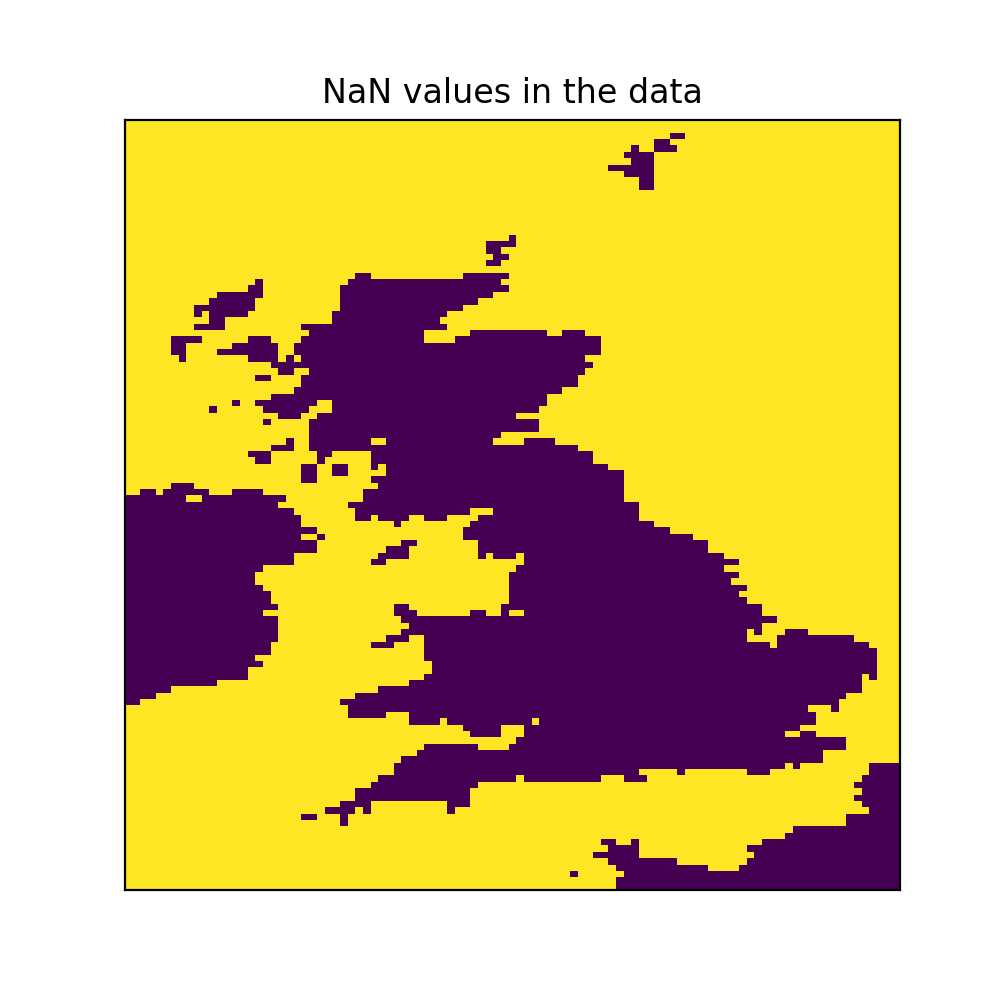

In [9]:
temperature_data = data['d2m']

plt.figure(figsize=(5, 5))
ax = temperature_data.isnull().sum(dim='valid_time').plot(add_colorbar=False)
plt.title('NaN values in the data')
plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.yticks([])
plt.show()

Now downloaded a file with multiple variables (temperatures, soil, percipitation, surface pressure, wind strength (u and v components)) across multiple years (1950 to 2025)

In [10]:
data = xr.open_dataset(r"/Users/anvijoy/Desktop/Anvi/Uni Notes/Internal Placement/data_stream-moda-2.nc")

In [11]:
# Prints all the variables listed in the .nc file
print(data.data_vars)

Data variables:
    d2m      (valid_time, latitude, longitude) float32 45MB ...
    t2m      (valid_time, latitude, longitude) float32 45MB ...
    skt      (valid_time, latitude, longitude) float32 45MB ...
    stl1     (valid_time, latitude, longitude) float32 45MB ...
    stl2     (valid_time, latitude, longitude) float32 45MB ...
    stl3     (valid_time, latitude, longitude) float32 45MB ...
    stl4     (valid_time, latitude, longitude) float32 45MB ...
    src      (valid_time, latitude, longitude) float32 45MB ...
    swvl1    (valid_time, latitude, longitude) float32 45MB ...
    swvl2    (valid_time, latitude, longitude) float32 45MB ...
    swvl3    (valid_time, latitude, longitude) float32 45MB ...
    swvl4    (valid_time, latitude, longitude) float32 45MB ...
    u10      (valid_time, latitude, longitude) float32 45MB ...
    v10      (valid_time, latitude, longitude) float32 45MB ...
    sp       (valid_time, latitude, longitude) float32 45MB ...
    tp       (valid_time

In [12]:
# Prints all the dimensions listed in the .nc file
print(data.dims)

FrozenMappingWarningOnValuesAccess({'valid_time': 905, 'latitude': 121, 'longitude': 103})


In [13]:
# Prints all the attributes listed in the .nc file
print(data.attrs)

{'GRIB_centre': 'ecmf', 'GRIB_centreDescription': 'European Centre for Medium-Range Weather Forecasts', 'GRIB_subCentre': 0, 'Conventions': 'CF-1.7', 'institution': 'European Centre for Medium-Range Weather Forecasts', 'history': '2025-06-30T19:25 GRIB to CDM+CF via cfgrib-0.9.15.0/ecCodes-2.41.0 with {"source": "data.grib", "filter_by_keys": {"stream": ["moda"]}, "encode_cf": ["parameter", "time", "geography", "vertical"]}'}


In [14]:
# Prints the data of the variable
print(data.src)

<xarray.DataArray 'src' (valid_time: 905, latitude: 121, longitude: 103)> Size: 45MB
[11279015 values with dtype=float32]
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 7kB 1950-01-01 ... 2025-05-01
  * latitude    (latitude) float64 968B 61.0 60.9 60.8 60.7 ... 49.2 49.1 49.0
  * longitude   (longitude) float64 824B -8.2 -8.1 -8.0 -7.9 ... 1.7 1.8 1.9 2.0
    expver      (valid_time) <U4 14kB ...
Attributes: (12/31)
    GRIB_paramId:                             198
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      12463
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_gridType:                            regular_ll
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               m of water equivalent
    long_name:                                Skin reservoir con

In [15]:
# Variables can be converted to numpy arrays
data_one_year = data.src.values
data_all_months = data.src.values

# Print the shape of the numpy array
print(data_one_year.shape)
print(data_all_months.shape)

(905, 121, 103)
(905, 121, 103)


In [16]:
print(data_one_year)

[[[           nan            nan            nan ...            nan
              nan            nan]
  [           nan            nan            nan ...            nan
              nan            nan]
  [           nan            nan            nan ...            nan
              nan            nan]
  ...
  [           nan            nan            nan ... 7.65770674e-05
   7.63982534e-05 7.85440207e-05]
  [           nan            nan            nan ... 7.76052475e-05
   7.89463520e-05 8.05556774e-05]
  [           nan            nan            nan ... 7.79181719e-05
   7.86781311e-05 7.38352537e-05]]

 [[           nan            nan            nan ...            nan
              nan            nan]
  [           nan            nan            nan ...            nan
              nan            nan]
  [           nan            nan            nan ...            nan
              nan            nan]
  ...
  [           nan            nan            nan ... 1.09493732e-04
   1.12339

<IPython.core.display.Javascript object>


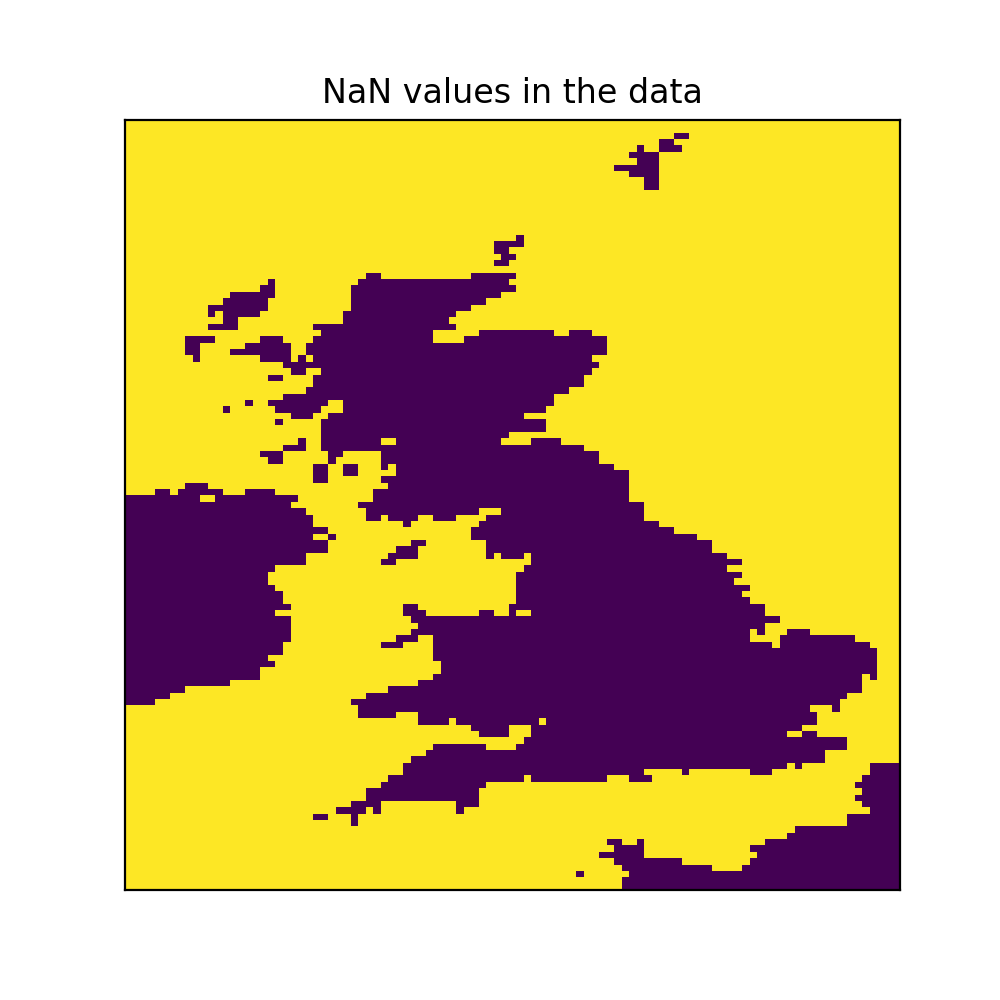

In [17]:
temperature_data = data['d2m']

plt.figure(figsize=(5, 5))
ax = temperature_data.isnull().sum(dim='valid_time').plot(add_colorbar=False)
plt.title('NaN values in the data')
plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.yticks([])
plt.show()

## Map for each variable

1. 2m Dewpoint Temperature
2. 2m Temperature
3. Skin Temperature
4. Soil Temperature Level 1
5. Soil Temperature Level 2
6. Soil Temperature Level 3
7. Soil Temperature Level 4
8. Skin Resevoir Content
9. Volumetric Soil Water Layer 1
10. Volumetric Soil Water Layer 2
11. Volumetric Soil Water Layer 3
12. Volumetric Soil Water Layer 4
13. 10m u-component of wind
14. 10m v-component of wind
15. Surface Pressure
16. Total Precipitation

<IPython.core.display.Javascript object>


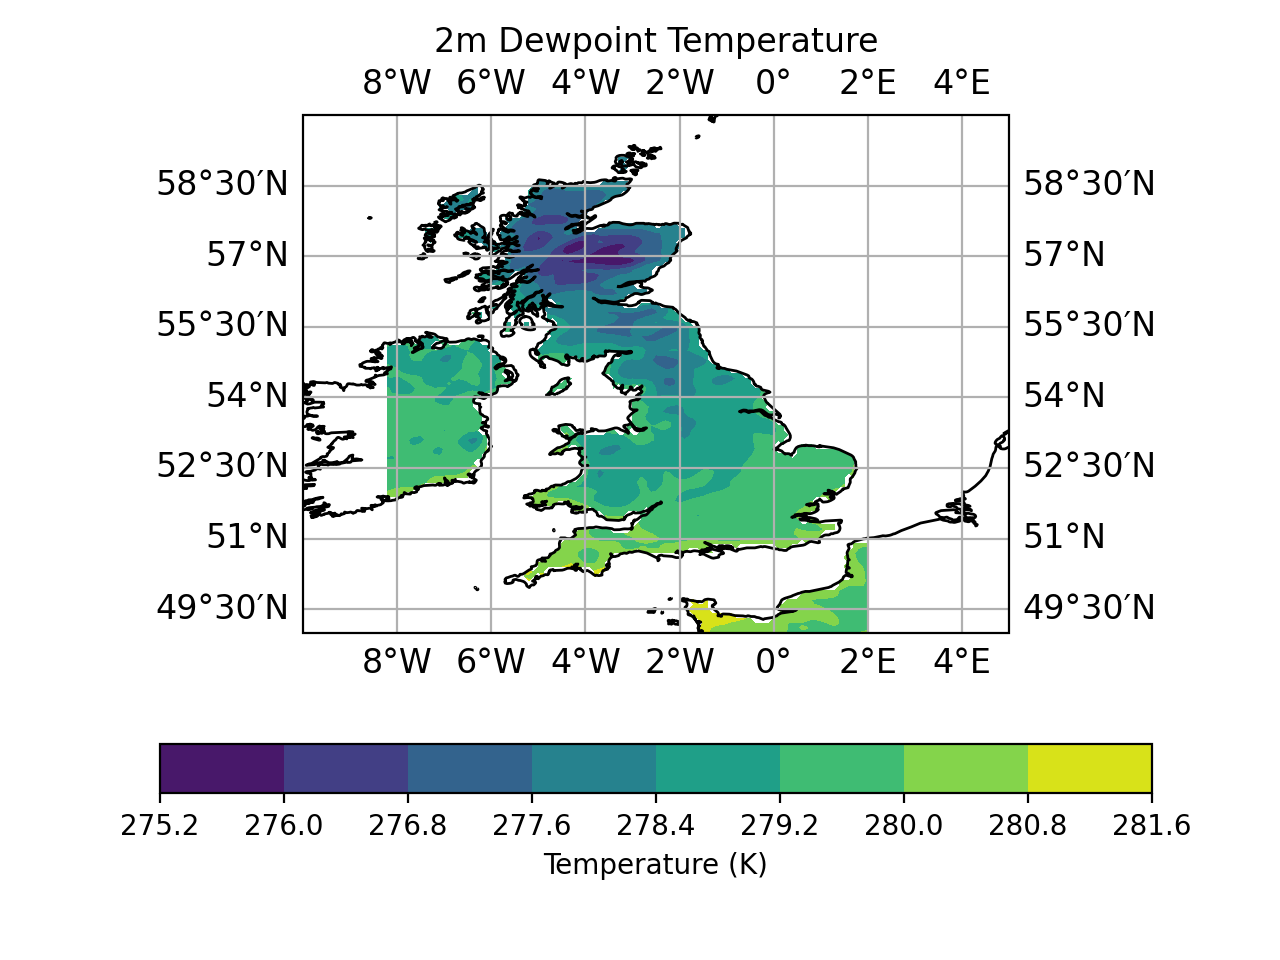

In [18]:
import cartopy.crs as ccrs


lons = data.variables['longitude'][:]
lats = data.variables['latitude'][:]

data_all_months = data.d2m.values
mean_temp = np.mean(data_all_months, axis=0)

plt.figure()


ax = plt.axes(projection=ccrs.PlateCarree())


ax.set_extent([-10, 5, 49, 60])
ax.set_title('2m Dewpoint Temperature')


ax.coastlines(resolution='10m', color='black')
ax.gridlines(draw_labels=True, dms=True)


contour = plt.contourf(lons, lats, mean_temp, cmap=plt.cm.viridis)


cbar = plt.colorbar(contour, orientation='horizontal')
cbar.set_label(u"Temperature (K)")

plt.show()

<IPython.core.display.Javascript object>


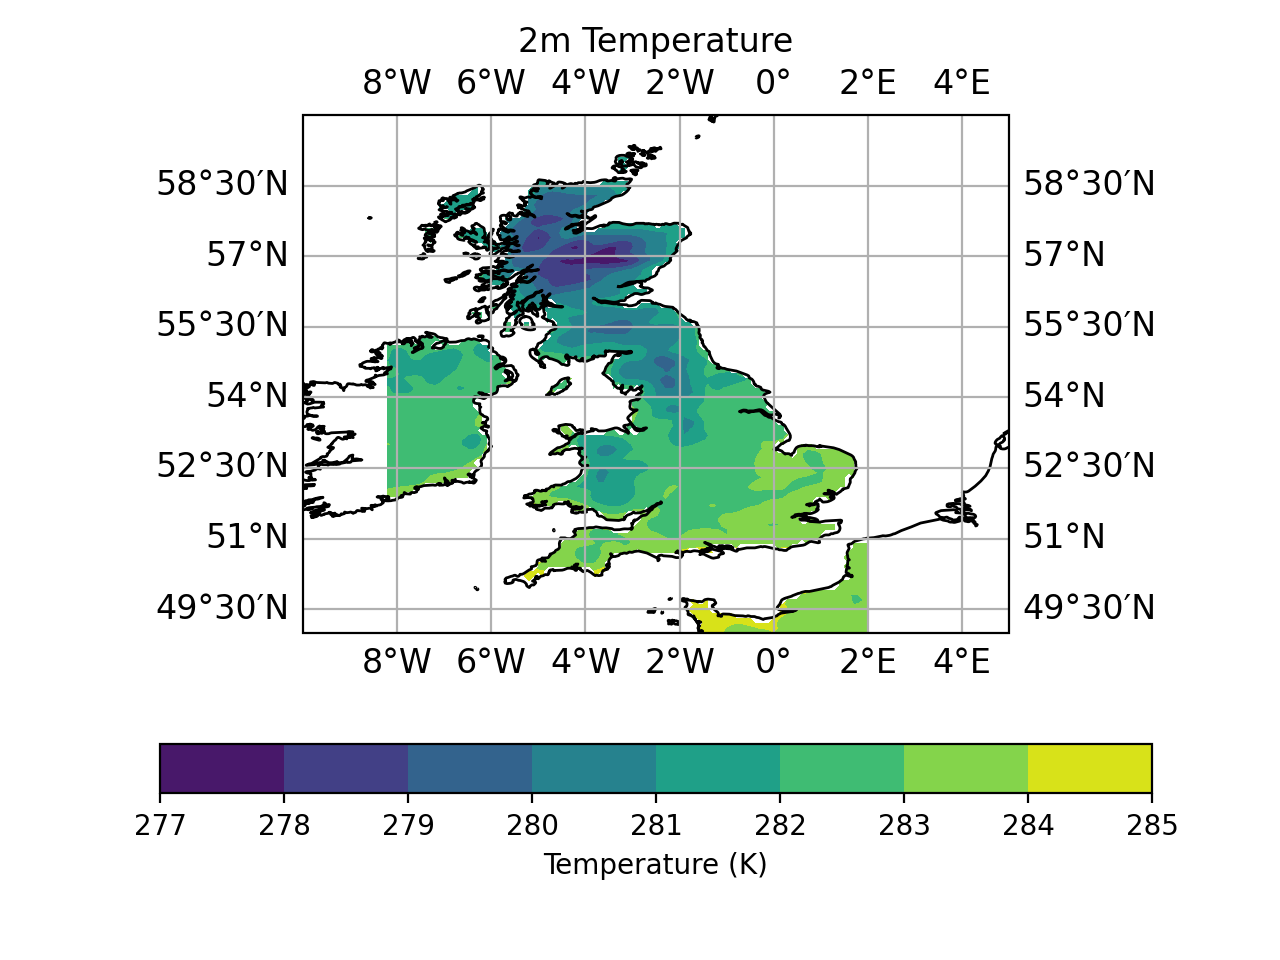

In [19]:
lons = data.variables['longitude'][:]
lats = data.variables['latitude'][:]

data_all_months = data.t2m.values
mean_temp = np.mean(data_all_months, axis=0)

plt.figure()


ax = plt.axes(projection=ccrs.PlateCarree())


ax.set_extent([-10, 5, 49, 60])
ax.set_title('2m Temperature')


ax.coastlines(resolution='10m', color='black')
ax.gridlines(draw_labels=True, dms=True)


contour = plt.contourf(lons, lats, mean_temp, cmap=plt.cm.viridis)


cbar = plt.colorbar(contour, orientation='horizontal')
cbar.set_label(u"Temperature (K)")

plt.show()

<IPython.core.display.Javascript object>


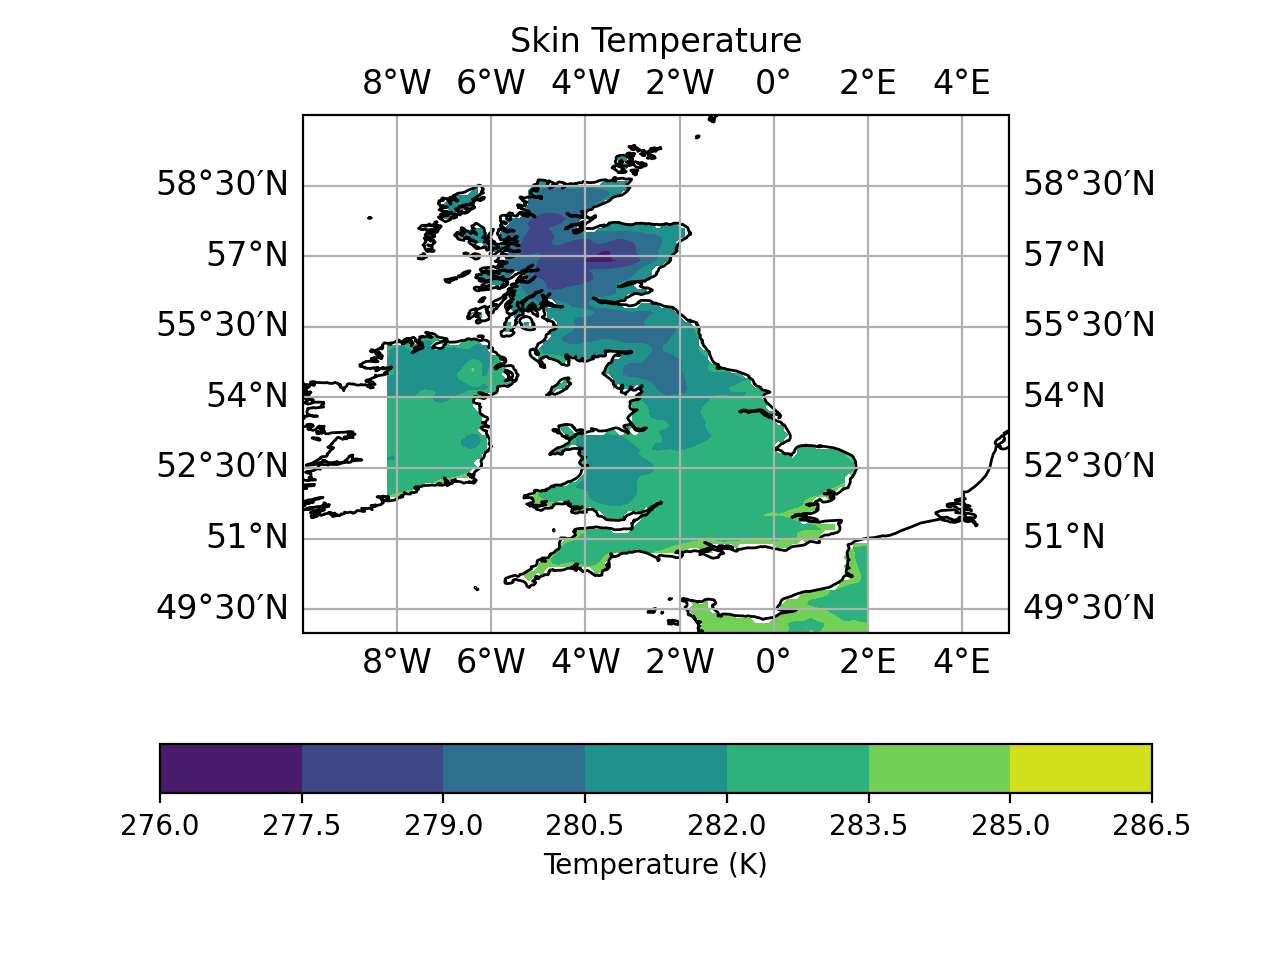

In [20]:
lons = data.variables['longitude'][:]
lats = data.variables['latitude'][:]

data_all_months = data.skt.values
mean_temp = np.mean(data_all_months, axis=0)

plt.figure()


ax = plt.axes(projection=ccrs.PlateCarree())


ax.set_extent([-10, 5, 49, 60])
ax.set_title('Skin Temperature')


ax.coastlines(resolution='10m', color='black')
ax.gridlines(draw_labels=True, dms=True)


contour = plt.contourf(lons, lats, mean_temp, cmap=plt.cm.viridis)


cbar = plt.colorbar(contour, orientation='horizontal')
cbar.set_label(u"Temperature (K)")

plt.show()

<IPython.core.display.Javascript object>


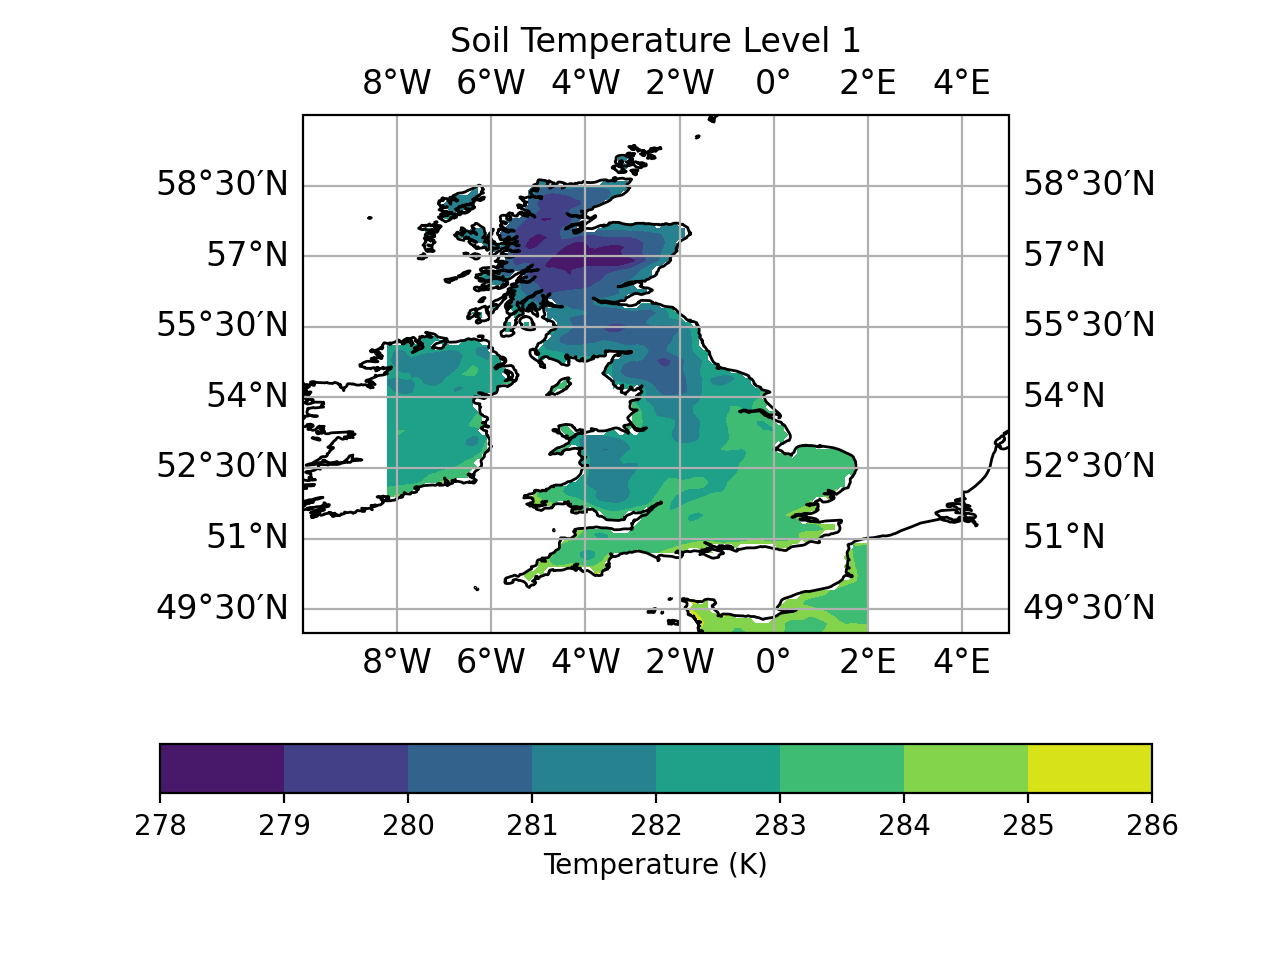

In [21]:
lons = data.variables['longitude'][:]
lats = data.variables['latitude'][:]

data_all_months = data.stl1.values
mean_temp = np.mean(data_all_months, axis=0)

plt.figure()


ax = plt.axes(projection=ccrs.PlateCarree())


ax.set_extent([-10, 5, 49, 60])
ax.set_title('Soil Temperature Level 1')


ax.coastlines(resolution='10m', color='black')
ax.gridlines(draw_labels=True, dms=True)


contour = plt.contourf(lons, lats, mean_temp, cmap=plt.cm.viridis)


cbar = plt.colorbar(contour, orientation='horizontal')
cbar.set_label(u"Temperature (K)")

plt.show()

<IPython.core.display.Javascript object>


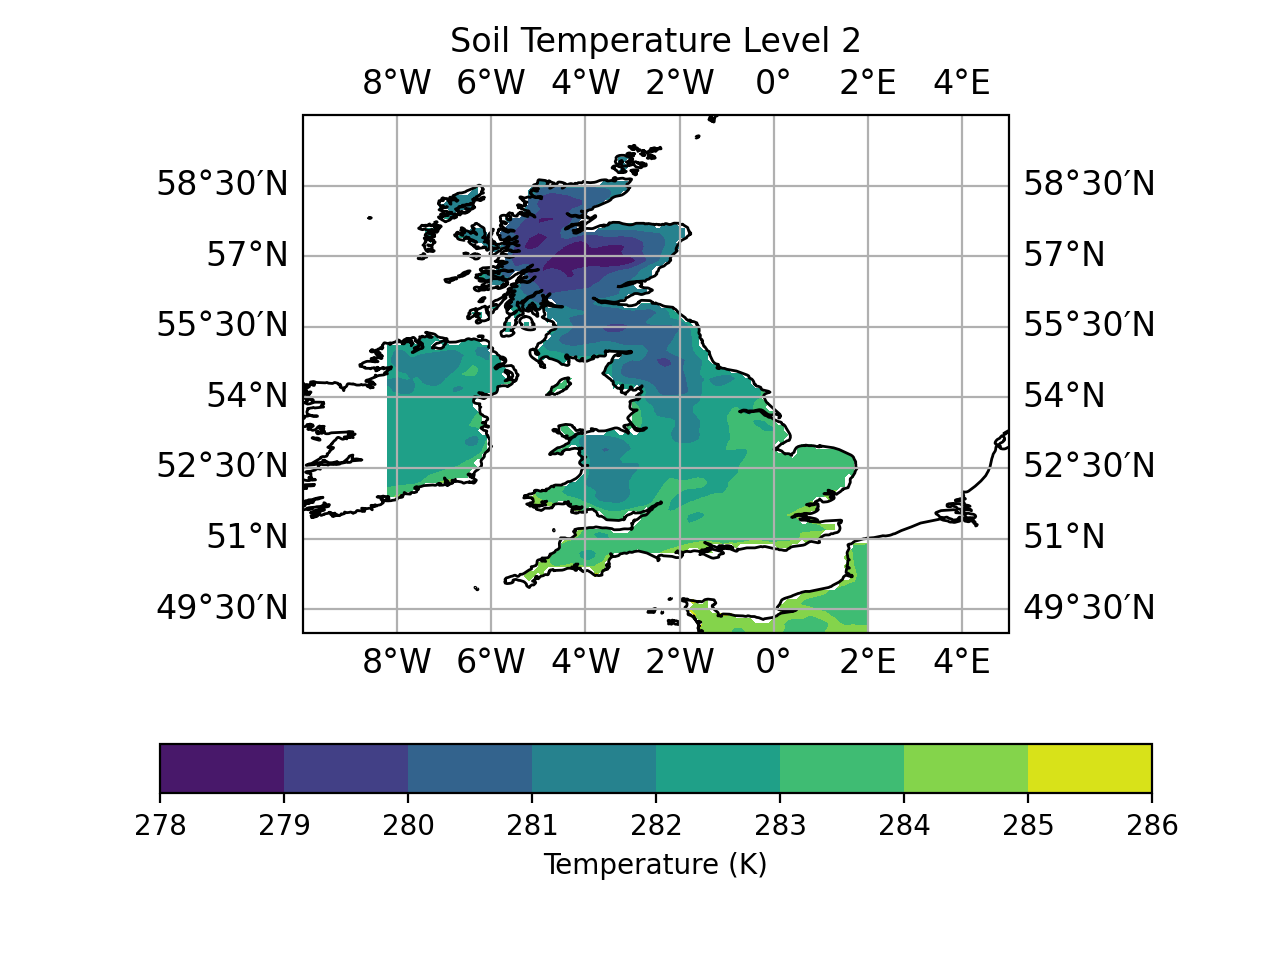

In [22]:
lons = data.variables['longitude'][:]
lats = data.variables['latitude'][:]

data_all_months = data.stl2.values
mean_temp = np.mean(data_all_months, axis=0)

plt.figure()


ax = plt.axes(projection=ccrs.PlateCarree())


ax.set_extent([-10, 5, 49, 60])
ax.set_title('Soil Temperature Level 2')


ax.coastlines(resolution='10m', color='black')
ax.gridlines(draw_labels=True, dms=True)


contour = plt.contourf(lons, lats, mean_temp, cmap=plt.cm.viridis)


cbar = plt.colorbar(contour, orientation='horizontal')
cbar.set_label(u"Temperature (K)")

plt.show()

<IPython.core.display.Javascript object>


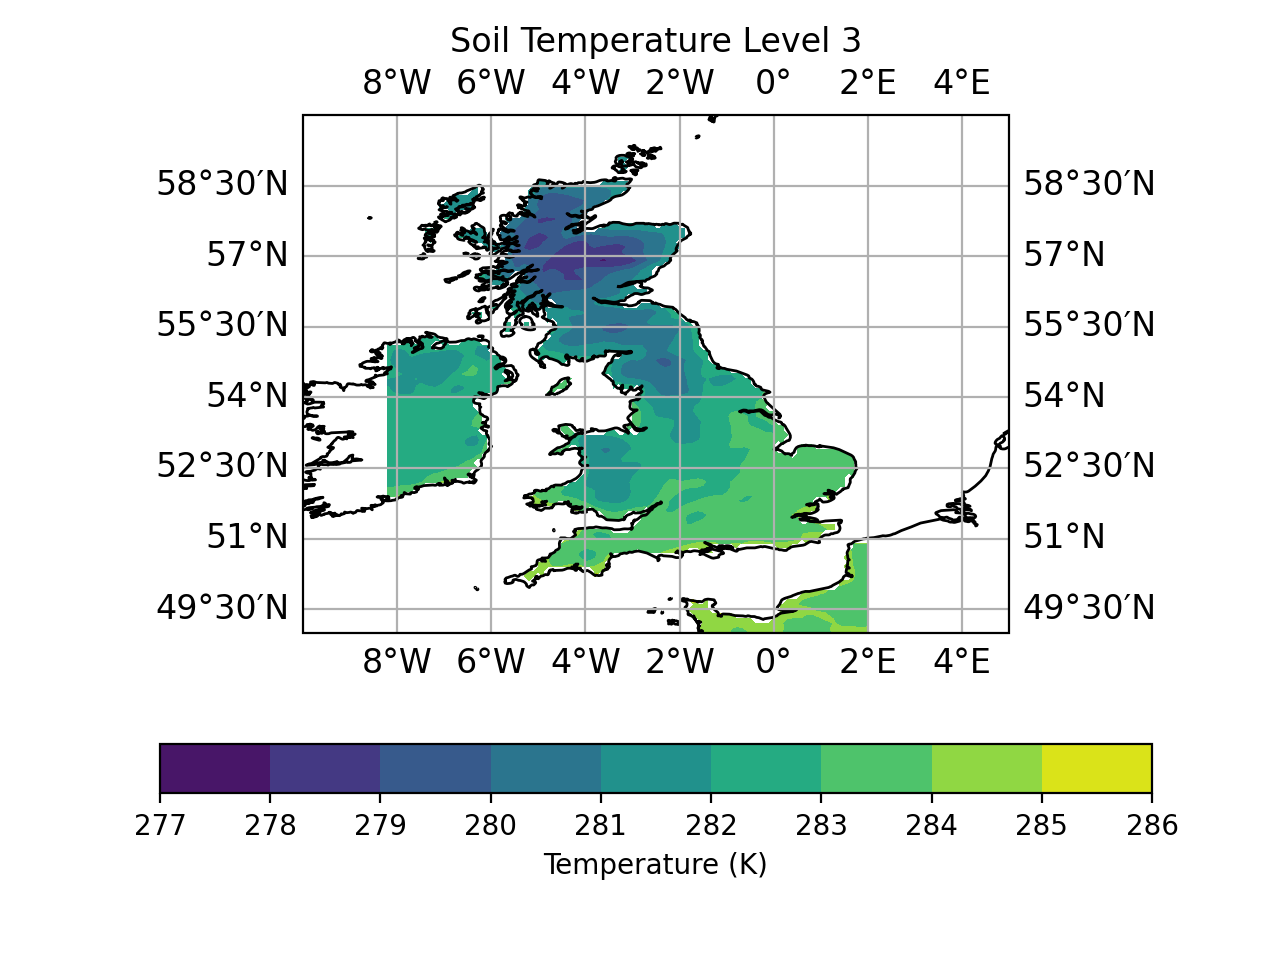

In [23]:
lons = data.variables['longitude'][:]
lats = data.variables['latitude'][:]

data_all_months = data.stl3.values
mean_temp = np.mean(data_all_months, axis=0)

plt.figure()


ax = plt.axes(projection=ccrs.PlateCarree())


ax.set_extent([-10, 5, 49, 60])
ax.set_title('Soil Temperature Level 3')


ax.coastlines(resolution='10m', color='black')
ax.gridlines(draw_labels=True, dms=True)


contour = plt.contourf(lons, lats, mean_temp, cmap=plt.cm.viridis)


cbar = plt.colorbar(contour, orientation='horizontal')
cbar.set_label(u"Temperature (K)")

plt.show()

<IPython.core.display.Javascript object>


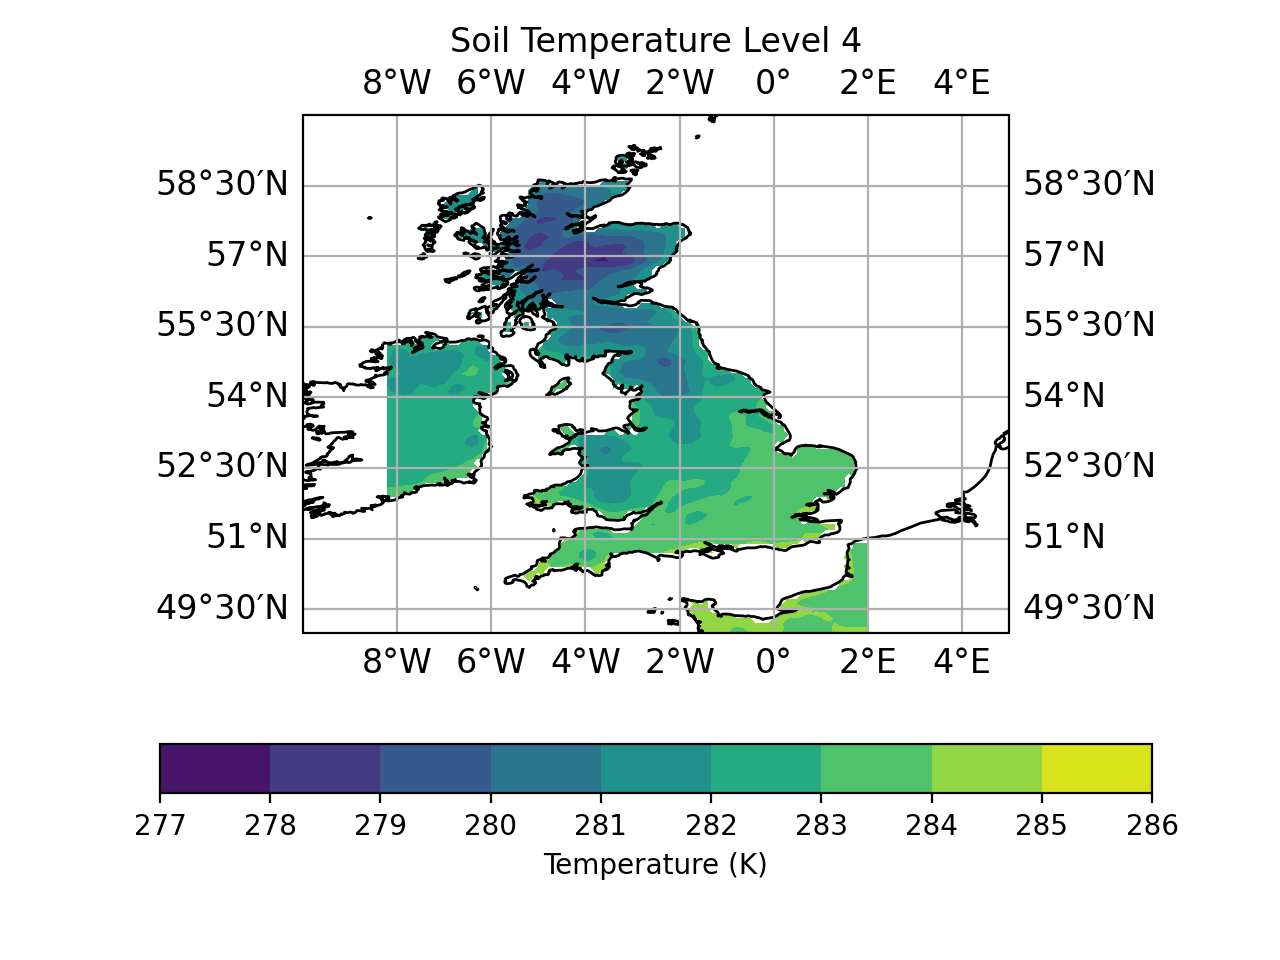

In [24]:
lons = data.variables['longitude'][:]
lats = data.variables['latitude'][:]

data_all_months = data.stl4.values
mean_temp = np.mean(data_all_months, axis=0)

plt.figure()


ax = plt.axes(projection=ccrs.PlateCarree())


ax.set_extent([-10, 5, 49, 60])
ax.set_title('Soil Temperature Level 4')


ax.coastlines(resolution='10m', color='black')
ax.gridlines(draw_labels=True, dms=True)


contour = plt.contourf(lons, lats, mean_temp, cmap=plt.cm.viridis)


cbar = plt.colorbar(contour, orientation='horizontal')
cbar.set_label(u"Temperature (K)")

plt.show()

<IPython.core.display.Javascript object>


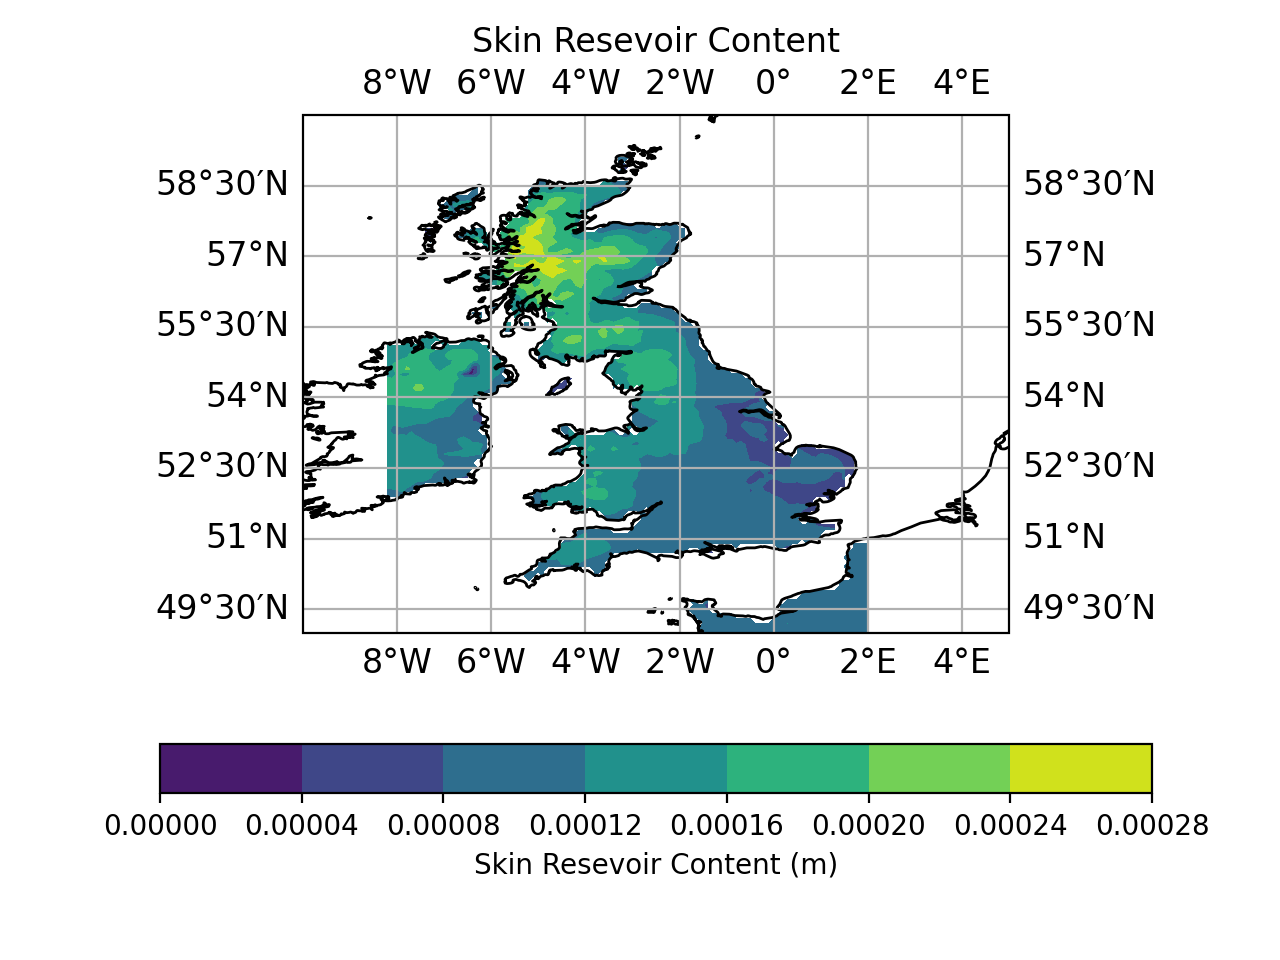

In [25]:
lons = data.variables['longitude'][:]
lats = data.variables['latitude'][:]

data_all_months = data.src.values
mean_temp = np.mean(data_all_months, axis=0)

plt.figure()


ax = plt.axes(projection=ccrs.PlateCarree())


ax.set_extent([-10, 5, 49, 60])
ax.set_title('Skin Resevoir Content')


ax.coastlines(resolution='10m', color='black')
ax.gridlines(draw_labels=True, dms=True)


contour = plt.contourf(lons, lats, mean_temp, cmap=plt.cm.viridis)


cbar = plt.colorbar(contour, orientation='horizontal')
cbar.set_label(u"Skin Resevoir Content (m)")

plt.show()

<IPython.core.display.Javascript object>


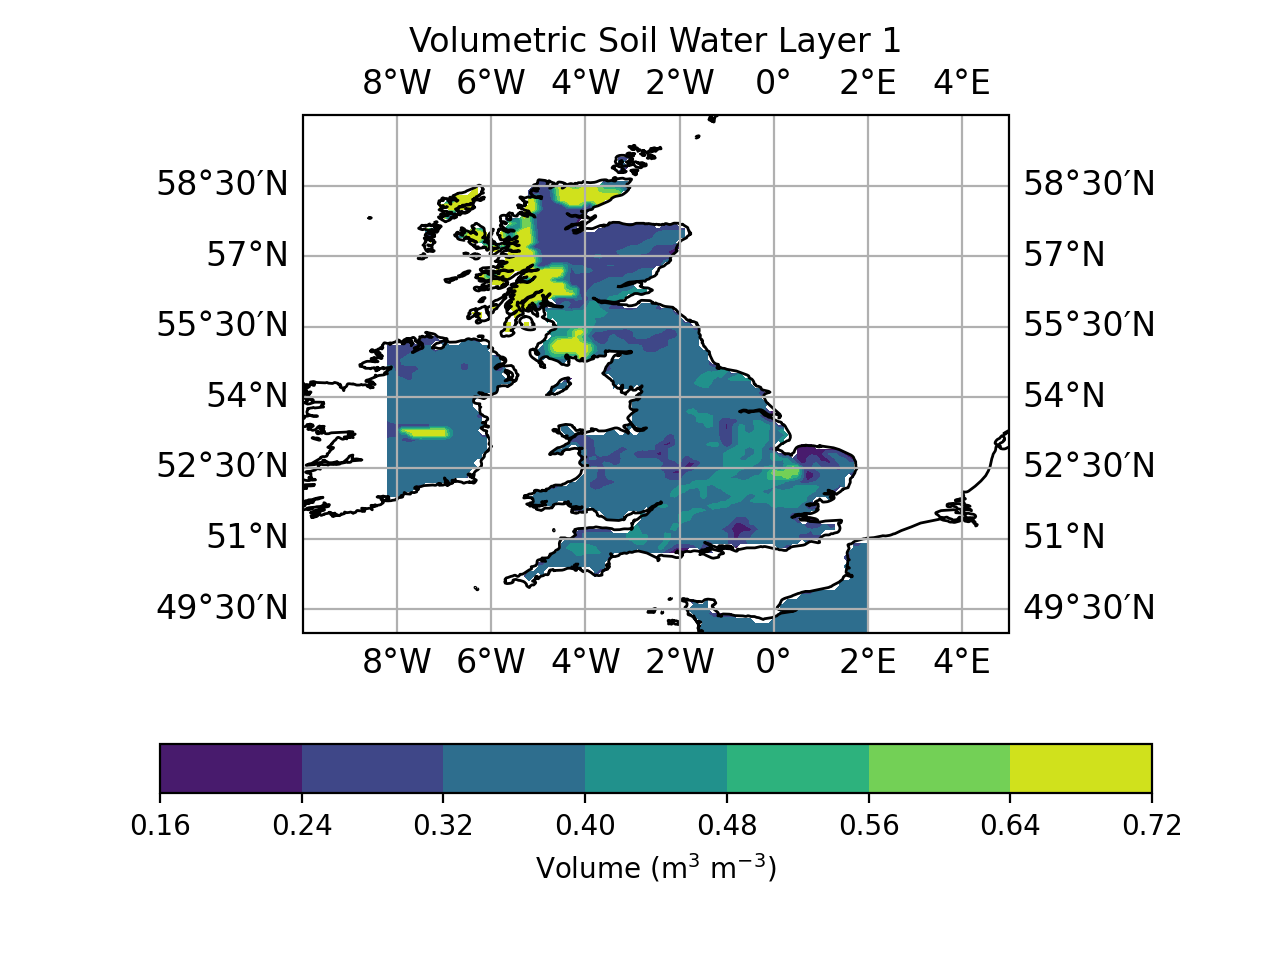

In [26]:
lons = data.variables['longitude'][:]
lats = data.variables['latitude'][:]

data_all_months = data.swvl1.values
mean_temp = np.mean(data_all_months, axis=0)

plt.figure()


ax = plt.axes(projection=ccrs.PlateCarree())


ax.set_extent([-10, 5, 49, 60])
ax.set_title('Volumetric Soil Water Layer 1')


ax.coastlines(resolution='10m', color='black')
ax.gridlines(draw_labels=True, dms=True)


contour = plt.contourf(lons, lats, mean_temp, cmap=plt.cm.viridis)


cbar = plt.colorbar(contour, orientation='horizontal')
cbar.set_label(u"Volume (m$^3$ m$^{-3}$)")

plt.show()

<IPython.core.display.Javascript object>


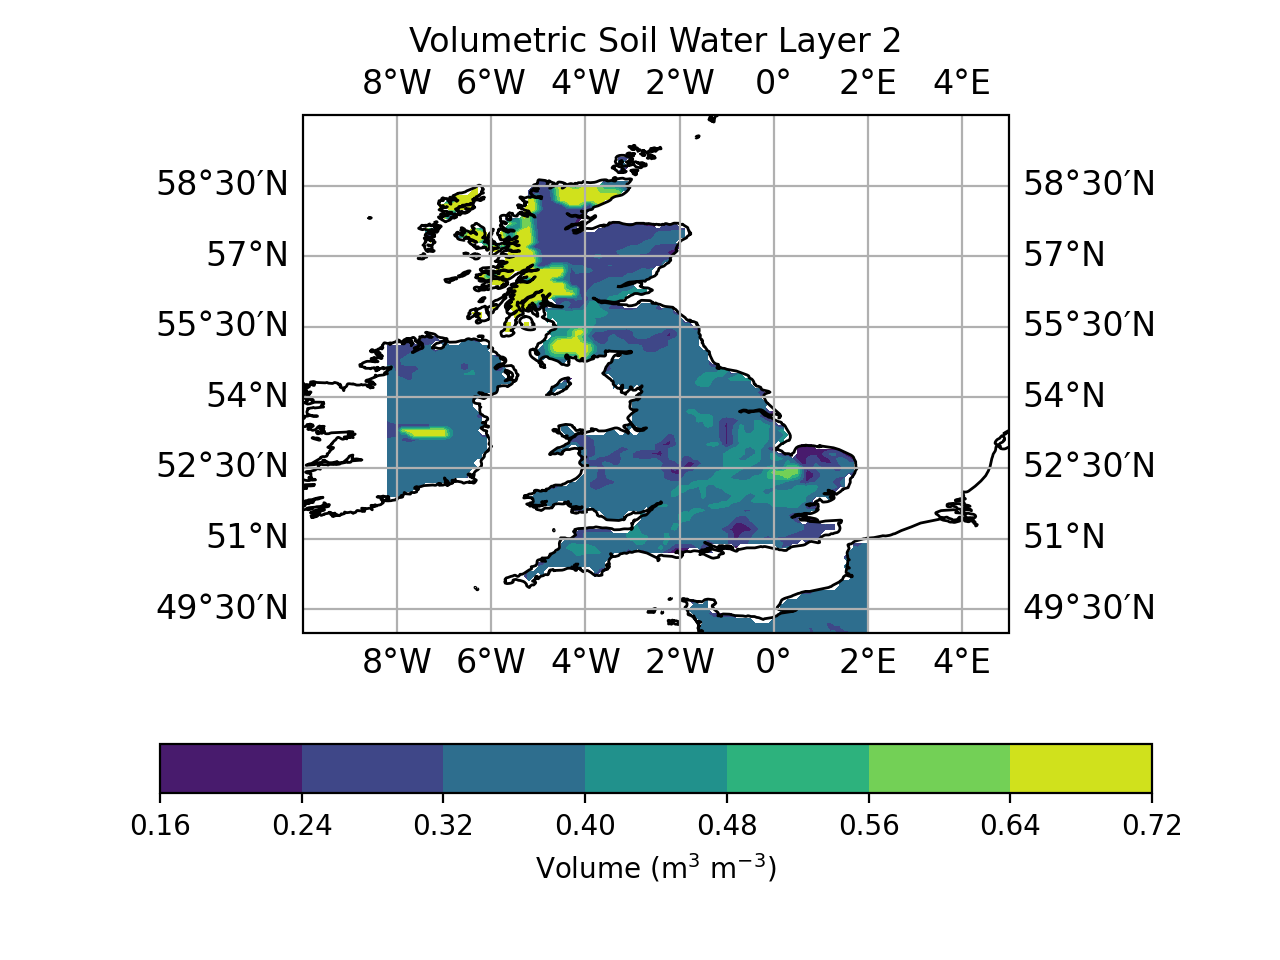

In [27]:
lons = data.variables['longitude'][:]
lats = data.variables['latitude'][:]

data_all_months = data.swvl2.values
mean_temp = np.mean(data_all_months, axis=0)

plt.figure()


ax = plt.axes(projection=ccrs.PlateCarree())


ax.set_extent([-10, 5, 49, 60])
ax.set_title('Volumetric Soil Water Layer 2')


ax.coastlines(resolution='10m', color='black')
ax.gridlines(draw_labels=True, dms=True)


contour = plt.contourf(lons, lats, mean_temp, cmap=plt.cm.viridis)


cbar = plt.colorbar(contour, orientation='horizontal')
cbar.set_label(u"Volume (m$^3$ m$^{-3}$)")

plt.show()

<IPython.core.display.Javascript object>


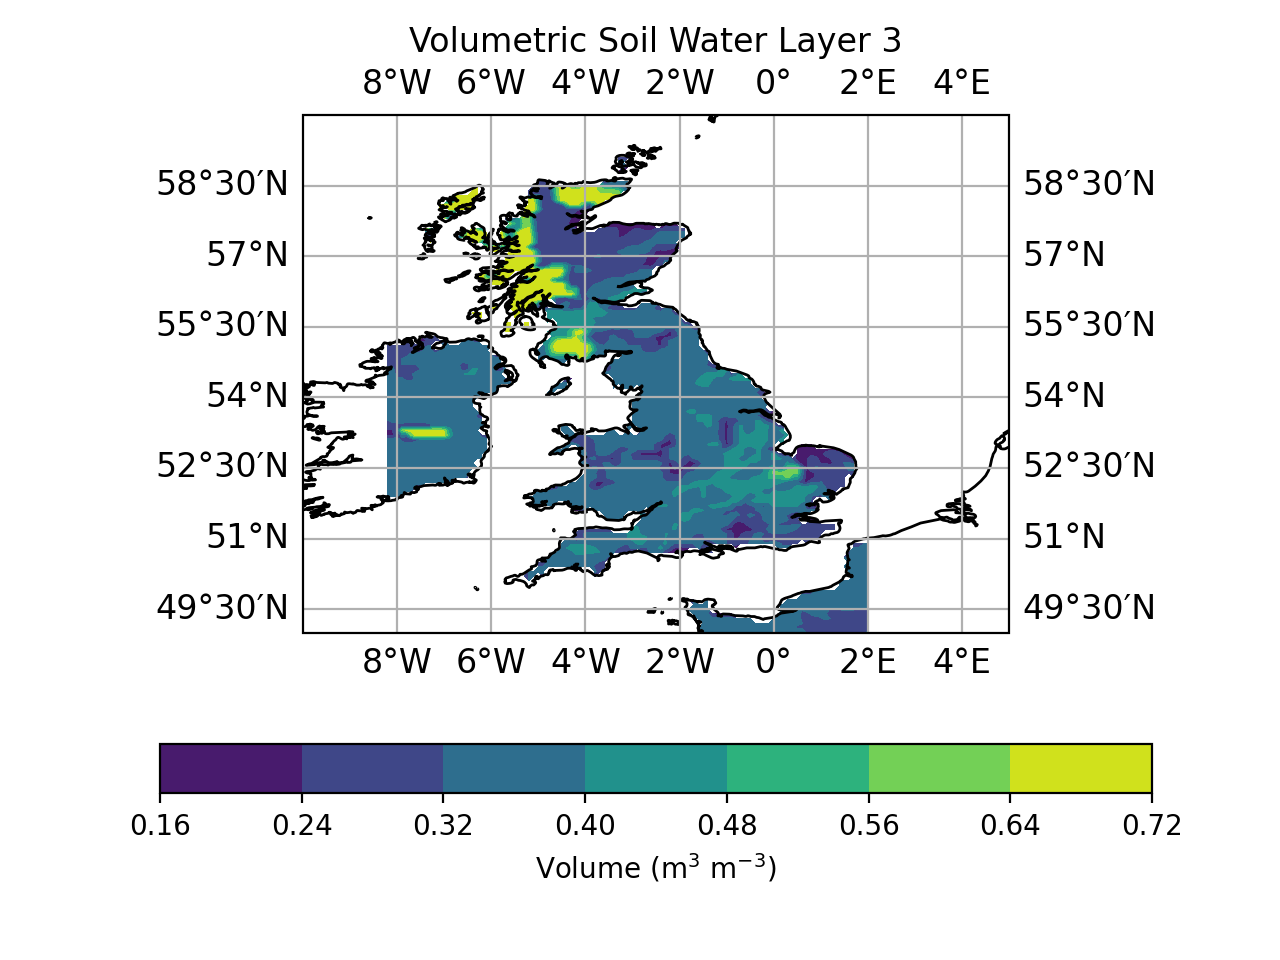

In [28]:
lons = data.variables['longitude'][:]
lats = data.variables['latitude'][:]

data_all_months = data.swvl3.values
mean_temp = np.mean(data_all_months, axis=0)

plt.figure()


ax = plt.axes(projection=ccrs.PlateCarree())


ax.set_extent([-10, 5, 49, 60])
ax.set_title('Volumetric Soil Water Layer 3')


ax.coastlines(resolution='10m', color='black')
ax.gridlines(draw_labels=True, dms=True)


contour = plt.contourf(lons, lats, mean_temp, cmap=plt.cm.viridis)


cbar = plt.colorbar(contour, orientation='horizontal')
cbar.set_label(u"Volume (m$^3$ m$^{-3}$)")

plt.show()

<IPython.core.display.Javascript object>


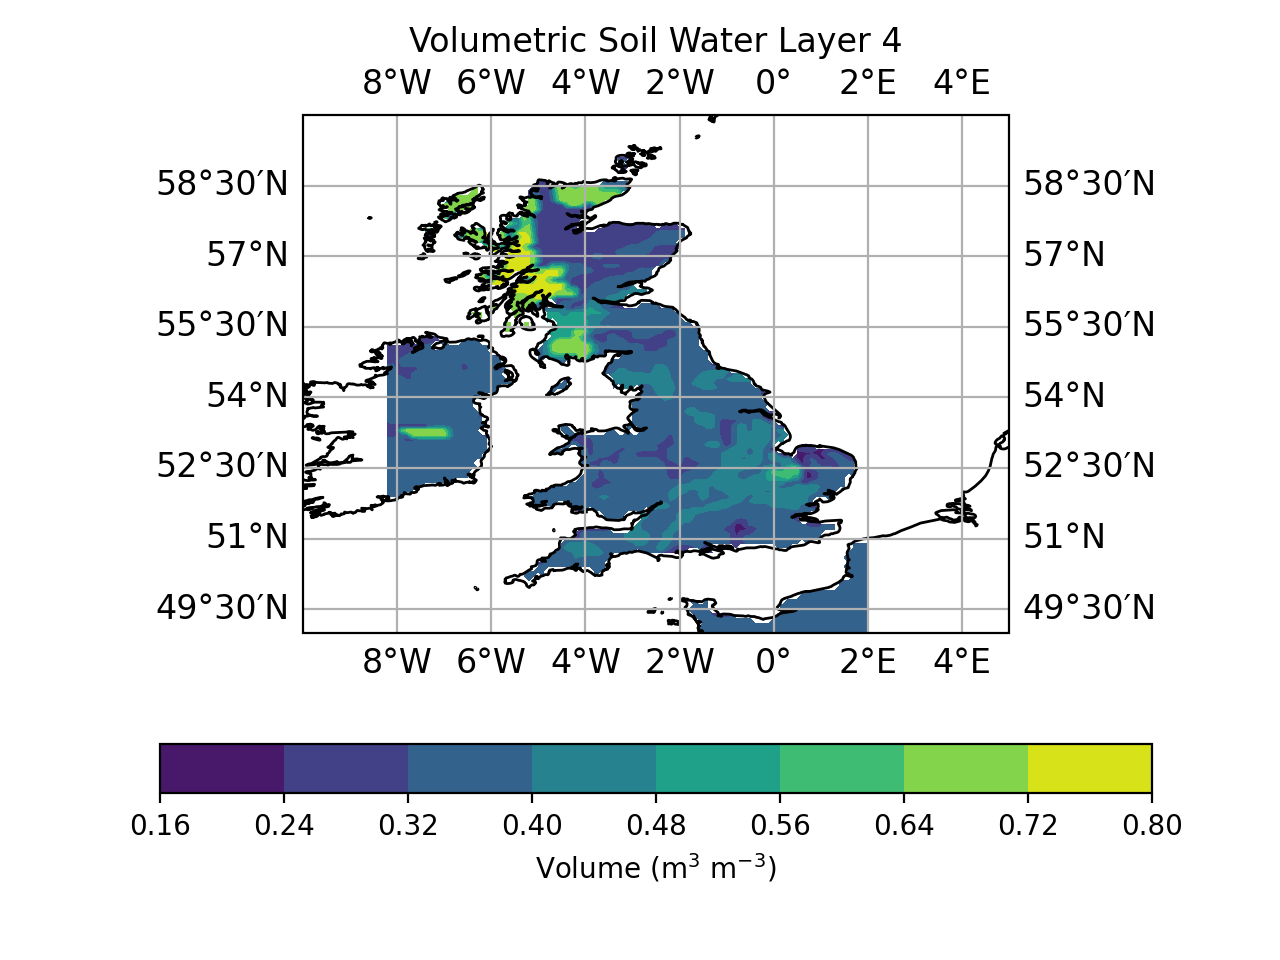

In [29]:
lons = data.variables['longitude'][:]
lats = data.variables['latitude'][:]

data_all_months = data.swvl4.values
mean_temp = np.mean(data_all_months, axis=0)

plt.figure()


ax = plt.axes(projection=ccrs.PlateCarree())


ax.set_extent([-10, 5, 49, 60])
ax.set_title('Volumetric Soil Water Layer 4')


ax.coastlines(resolution='10m', color='black')
ax.gridlines(draw_labels=True, dms=True)


contour = plt.contourf(lons, lats, mean_temp, cmap=plt.cm.viridis)


cbar = plt.colorbar(contour, orientation='horizontal')
cbar.set_label(u"Volume (m$^3$ m$^{-3}$)")

plt.show()

<IPython.core.display.Javascript object>


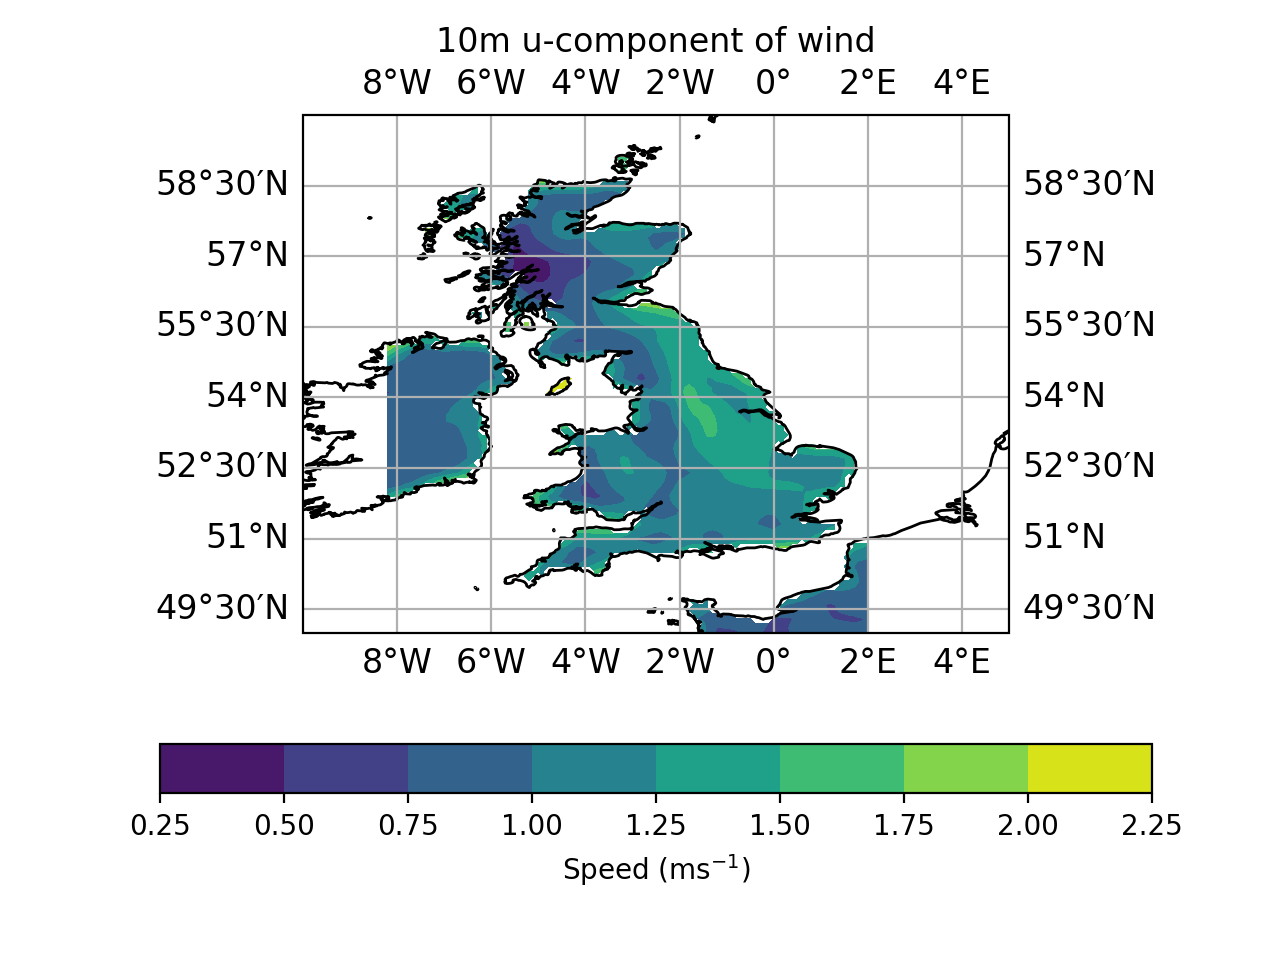

In [30]:
lons = data.variables['longitude'][:]
lats = data.variables['latitude'][:]

data_all_months = data.u10.values
mean_temp = np.mean(data_all_months, axis=0)

plt.figure()


ax = plt.axes(projection=ccrs.PlateCarree())


ax.set_extent([-10, 5, 49, 60])
ax.set_title('10m u-component of wind')


ax.coastlines(resolution='10m', color='black')
ax.gridlines(draw_labels=True, dms=True)


contour = plt.contourf(lons, lats, mean_temp, cmap=plt.cm.viridis)


cbar = plt.colorbar(contour, orientation='horizontal')
cbar.set_label(u"Speed (ms$^{-1}$)")

plt.show()

<IPython.core.display.Javascript object>


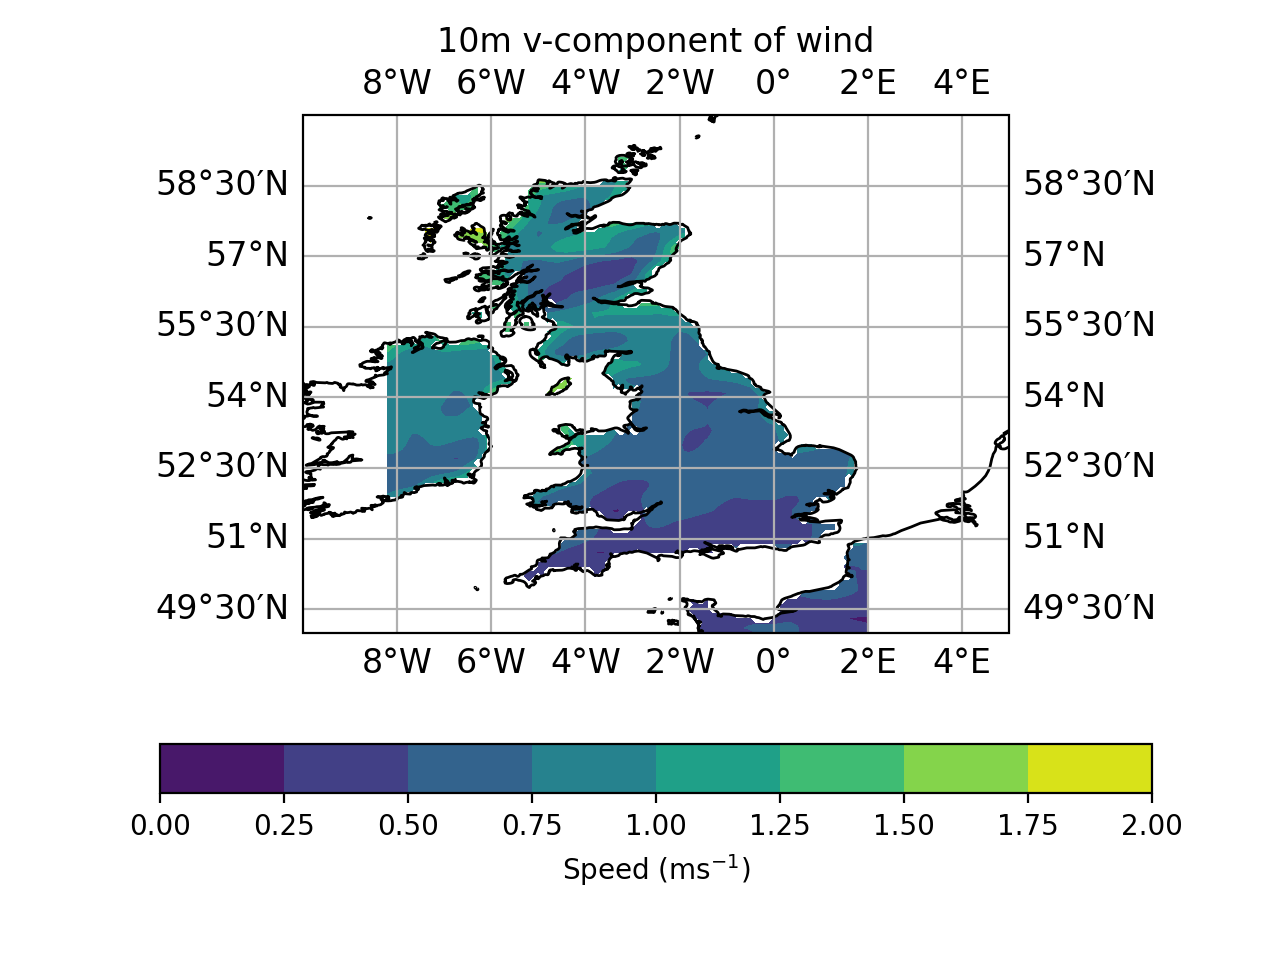

In [31]:
lons = data.variables['longitude'][:]
lats = data.variables['latitude'][:]

data_all_months = data.v10.values
mean_temp = np.mean(data_all_months, axis=0)

plt.figure()


ax = plt.axes(projection=ccrs.PlateCarree())


ax.set_extent([-10, 5, 49, 60])
ax.set_title('10m v-component of wind')


ax.coastlines(resolution='10m', color='black')
ax.gridlines(draw_labels=True, dms=True)


contour = plt.contourf(lons, lats, mean_temp, cmap=plt.cm.viridis)


cbar = plt.colorbar(contour, orientation='horizontal')
cbar.set_label(u"Speed (ms$^{-1}$)")

plt.show()

<IPython.core.display.Javascript object>


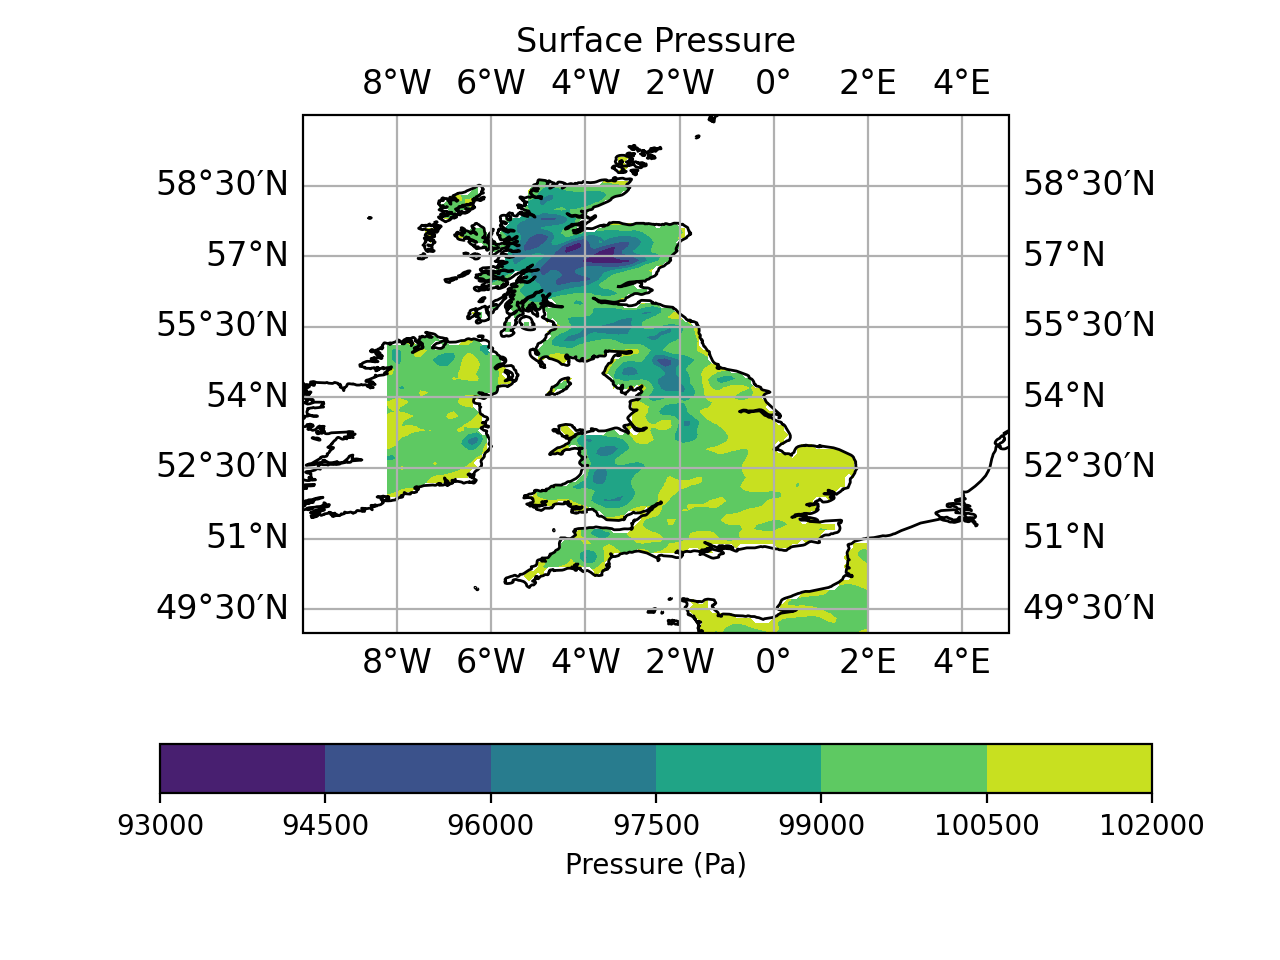

In [32]:
lons = data.variables['longitude'][:]
lats = data.variables['latitude'][:]

data_all_months = data.sp.values
mean_temp = np.mean(data_all_months, axis=0)

plt.figure()


ax = plt.axes(projection=ccrs.PlateCarree())


ax.set_extent([-10, 5, 49, 60])
ax.set_title('Surface Pressure')


ax.coastlines(resolution='10m', color='black')
ax.gridlines(draw_labels=True, dms=True)


contour = plt.contourf(lons, lats, mean_temp, cmap=plt.cm.viridis)


cbar = plt.colorbar(contour, orientation='horizontal')
cbar.set_label(u"Pressure (Pa)")

plt.show()

<IPython.core.display.Javascript object>


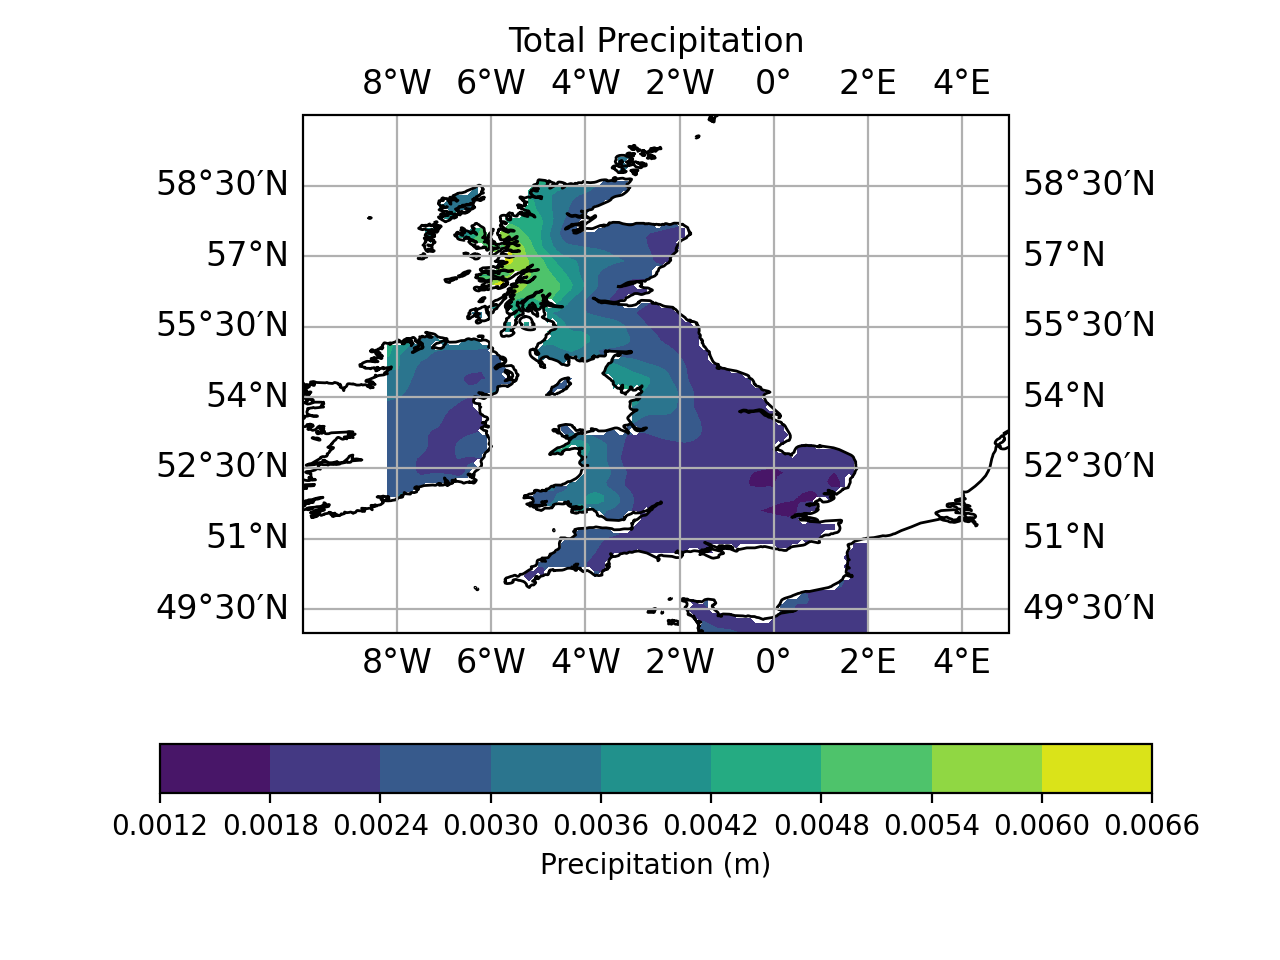

In [33]:
lons = data.variables['longitude'][:]
lats = data.variables['latitude'][:]

data_all_months = data.tp.values
mean_temp = np.mean(data_all_months, axis=0)

plt.figure()


ax = plt.axes(projection=ccrs.PlateCarree())


ax.set_extent([-10, 5, 49, 60])
ax.set_title('Total Precipitation')


ax.coastlines(resolution='10m', color='black')
ax.gridlines(draw_labels=True, dms=True)


contour = plt.contourf(lons, lats, mean_temp, cmap=plt.cm.viridis)


cbar = plt.colorbar(contour, orientation='horizontal')
cbar.set_label(u"Precipitation (m)")

plt.show()

## Plot for each variable 

1. 2m Dewpoint Temperature
2. 2m Temperature
3. Skin Temperature
4. Soil Temperature Level 1
5. Soil Temperature Level 2
6. Soil Temperature Level 3
7. Soil Temperature Level 4
8. Skin Resevoir Content
9. Volumetric Soil Water Layer 1
10. Volumetric Soil Water Layer 2
11. Volumetric Soil Water Layer 3
12. Volumetric Soil Water Layer 4
13. 10m u-component of wind
14. 10m v-component of wind
15. Surface Pressure
16. Total Precipitation

Slope: 0.01247 ± 0.00005 K per yearIntel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.



/Users/anvijoy/anaconda3/lib/python3.10/site-packages/skimage/measure/block.py:94: RuntimeWarning: Mean of empty slice
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)), **func_kwargs)


<IPython.core.display.Javascript object>


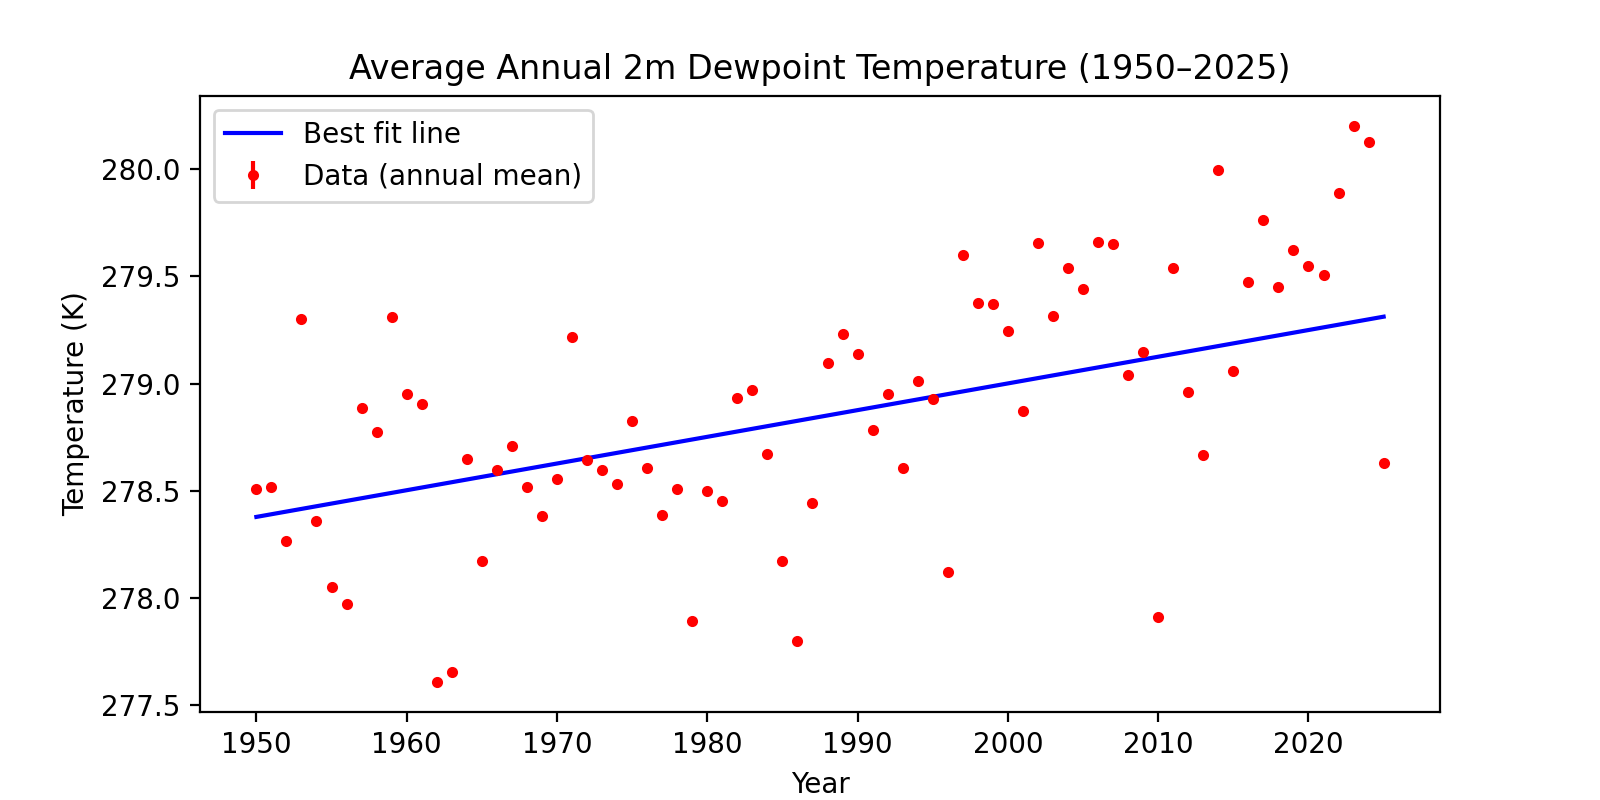

In [34]:
from skimage.measure import block_reduce
from scipy.optimize import curve_fit


data_all_months = data.d2m.values  
mean_value = np.nanmean(data_all_months)

temp = block_reduce(data_all_months, 
                    block_size=(12, 1, 1), 
                    func=np.nanmean, 
                    cval=mean_value)

temp_mean = np.nanmean(temp, axis=(1, 2))
time = np.arange(1950, 2026)

def linear_model(x, m, b):
    return m * x + b


spatial_std = np.nanstd(temp, axis=(1, 2))
n_points = temp.shape[1] * temp.shape[2]
y_err = spatial_std / np.sqrt(n_points)


popt, pcov = curve_fit(linear_model, time, temp_mean, sigma=y_err, absolute_sigma=True)

m, b = popt
m_err = np.sqrt(pcov[0,0])
b_err = np.sqrt(pcov[1,1])


print(f"Slope: {m:.5f} ± {m_err:.5f} K per year")


plt.figure(figsize=(8,4))
plt.errorbar(time, temp_mean, yerr=y_err, fmt='.', color='red', label='Data (annual mean)')
plt.plot(time, linear_model(time, *popt), 'b-', label='Best fit line')
plt.xlabel('Year')
plt.ylabel('Temperature (K)')
plt.title('Average Annual 2m Dewpoint Temperature (1950–2025)')
plt.legend()
plt.rcParams.update({'font.size': 12})
plt.show()


Slope: 0.01060 ± 0.00006 K per yearIntel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.



<IPython.core.display.Javascript object>


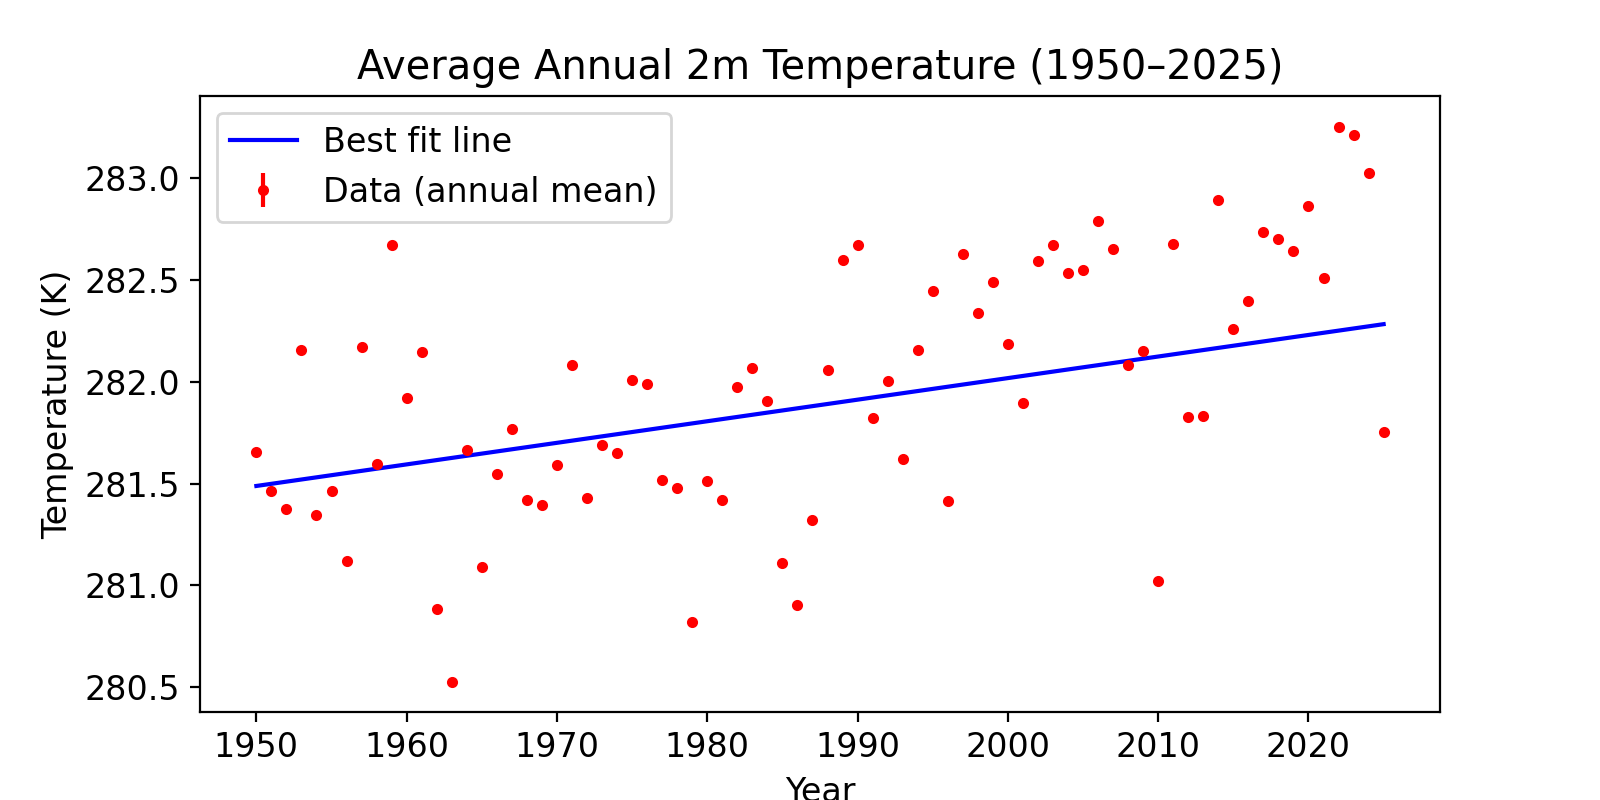

In [35]:
data_all_months = data.t2m.values  
mean_value = np.nanmean(data_all_months)

temp = block_reduce(data_all_months, 
                    block_size=(12, 1, 1), 
                    func=np.nanmean, 
                    cval=mean_value)

temp_mean = np.nanmean(temp, axis=(1, 2))
time = np.arange(1950, 2026)

def linear_model(x, m, b):
    return m * x + b


spatial_std = np.nanstd(temp, axis=(1, 2))
n_points = temp.shape[1] * temp.shape[2]
y_err = spatial_std / np.sqrt(n_points)


popt, pcov = curve_fit(linear_model, time, temp_mean, sigma=y_err, absolute_sigma=True)

m, b = popt
m_err = np.sqrt(pcov[0,0])
b_err = np.sqrt(pcov[1,1])


print(f"Slope: {m:.5f} ± {m_err:.5f} K per year")


plt.figure(figsize=(8,4))
plt.errorbar(time, temp_mean, yerr=y_err, fmt='.', color='red', label='Data (annual mean)')
plt.plot(time, linear_model(time, *popt), 'b-', label='Best fit line')
plt.xlabel('Year')
plt.ylabel('Temperature (K)')
plt.title('Average Annual 2m Temperature (1950–2025)')
plt.legend()
plt.rcParams.update({'font.size': 12})
plt.show()

Slope: 0.01052 ± 0.00006 K per yearIntel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.



/var/folders/_l/wt96l_z540q0zcwsfngpk6t00000gq/T/ipykernel_56372/1117213331.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8,4))


<IPython.core.display.Javascript object>


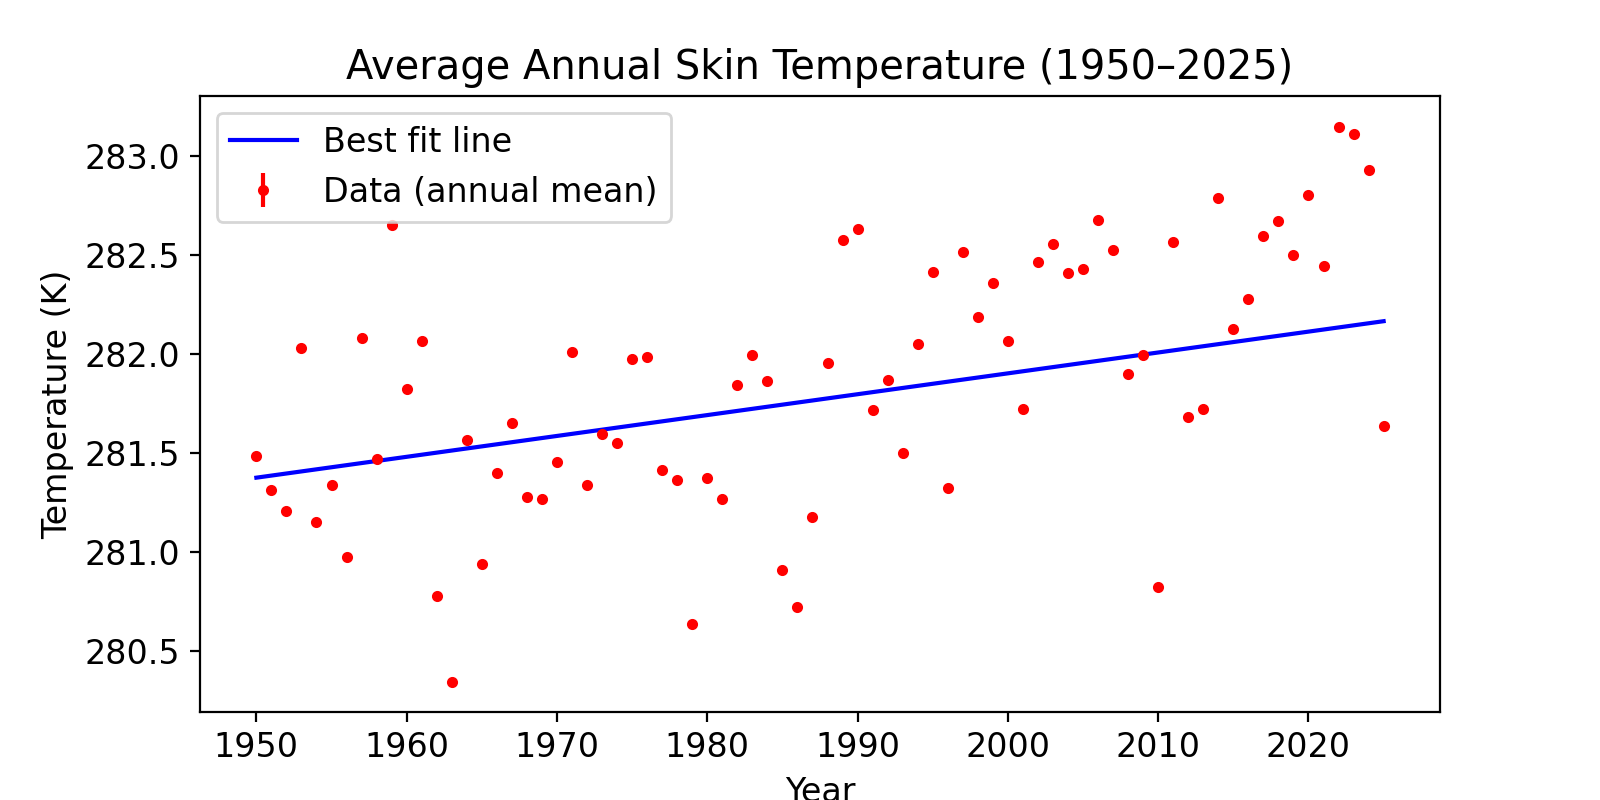

In [36]:
data_all_months = data.skt.values  
mean_value = np.nanmean(data_all_months)

temp = block_reduce(data_all_months, 
                    block_size=(12, 1, 1), 
                    func=np.nanmean, 
                    cval=mean_value)

temp_mean = np.nanmean(temp, axis=(1, 2))
time = np.arange(1950, 2026)

def linear_model(x, m, b):
    return m * x + b


spatial_std = np.nanstd(temp, axis=(1, 2))
n_points = temp.shape[1] * temp.shape[2]
y_err = spatial_std / np.sqrt(n_points)


popt, pcov = curve_fit(linear_model, time, temp_mean, sigma=y_err, absolute_sigma=True)

m, b = popt
m_err = np.sqrt(pcov[0,0])
b_err = np.sqrt(pcov[1,1])


print(f"Slope: {m:.5f} ± {m_err:.5f} K per year")


plt.figure(figsize=(8,4))
plt.errorbar(time, temp_mean, yerr=y_err, fmt='.', color='red', label='Data (annual mean)')
plt.plot(time, linear_model(time, *popt), 'b-', label='Best fit line')
plt.xlabel('Year')
plt.ylabel('Temperature (K)')
plt.title('Average Annual Skin Temperature (1950–2025)')
plt.legend()
plt.rcParams.update({'font.size': 12})
plt.show()


Slope: 0.01028 ± 0.00006 K per yearIntel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.



<IPython.core.display.Javascript object>


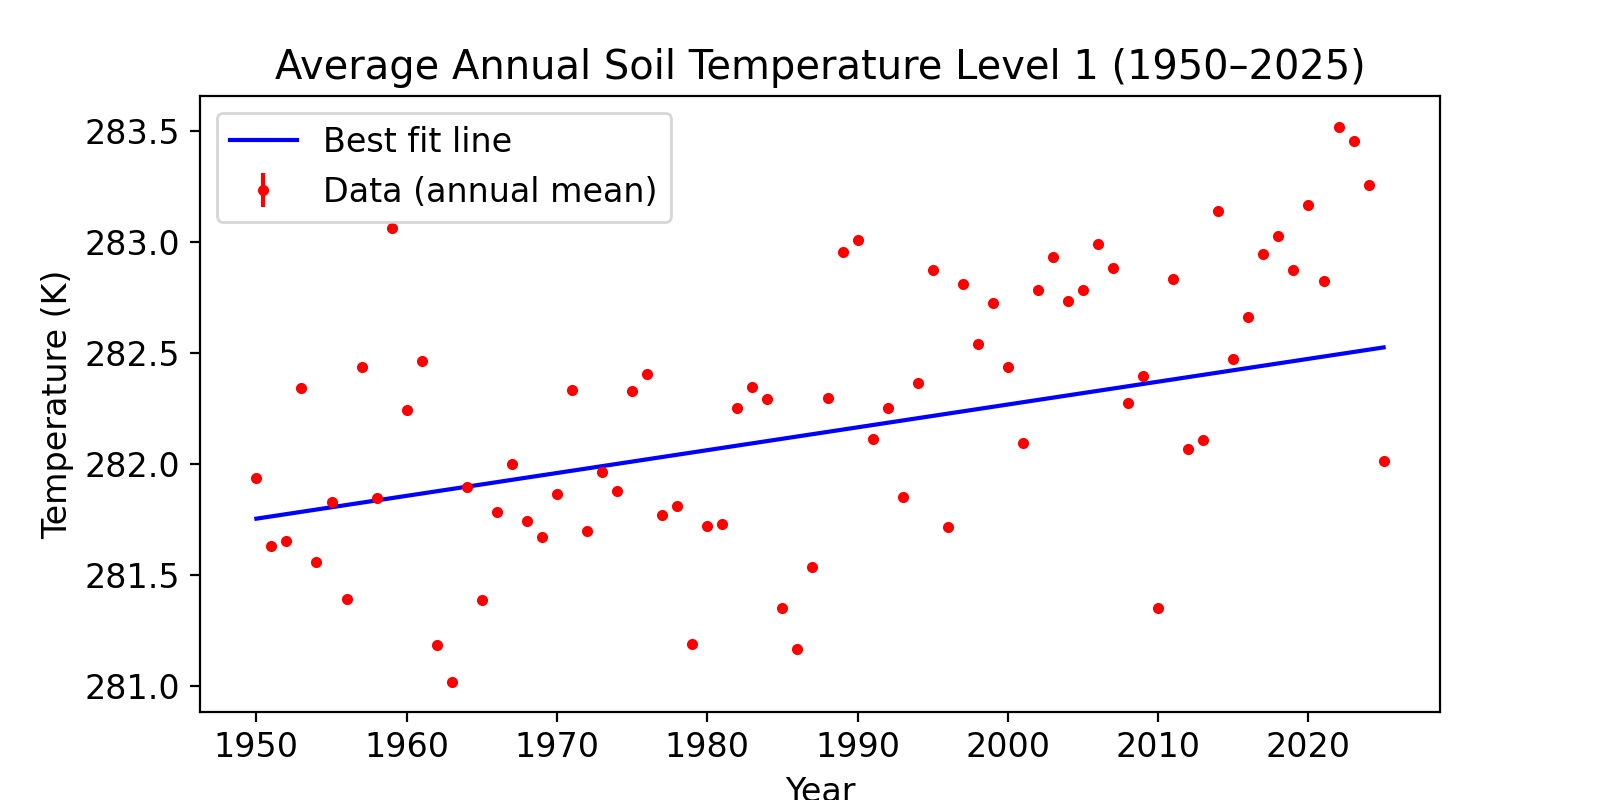

In [37]:
data_all_months = data.stl1.values  
mean_value = np.nanmean(data_all_months)

temp = block_reduce(data_all_months, 
                    block_size=(12, 1, 1), 
                    func=np.nanmean, 
                    cval=mean_value)

temp_mean = np.nanmean(temp, axis=(1, 2))
time = np.arange(1950, 2026)

def linear_model(x, m, b):
    return m * x + b


spatial_std = np.nanstd(temp, axis=(1, 2))
n_points = temp.shape[1] * temp.shape[2]
y_err = spatial_std / np.sqrt(n_points)


popt, pcov = curve_fit(linear_model, time, temp_mean, sigma=y_err, absolute_sigma=True)

m, b = popt
m_err = np.sqrt(pcov[0,0])
b_err = np.sqrt(pcov[1,1])


print(f"Slope: {m:.5f} ± {m_err:.5f} K per year")


plt.figure(figsize=(8,4))
plt.errorbar(time, temp_mean, yerr=y_err, fmt='.', color='red', label='Data (annual mean)')
plt.plot(time, linear_model(time, *popt), 'b-', label='Best fit line')
plt.xlabel('Year')
plt.ylabel('Temperature (K)')
plt.title('Average Annual Soil Temperature Level 1 (1950–2025)')
plt.legend()
plt.rcParams.update({'font.size': 12})
plt.show()

Slope: 0.01046 ± 0.00006 K per yearIntel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.



<IPython.core.display.Javascript object>


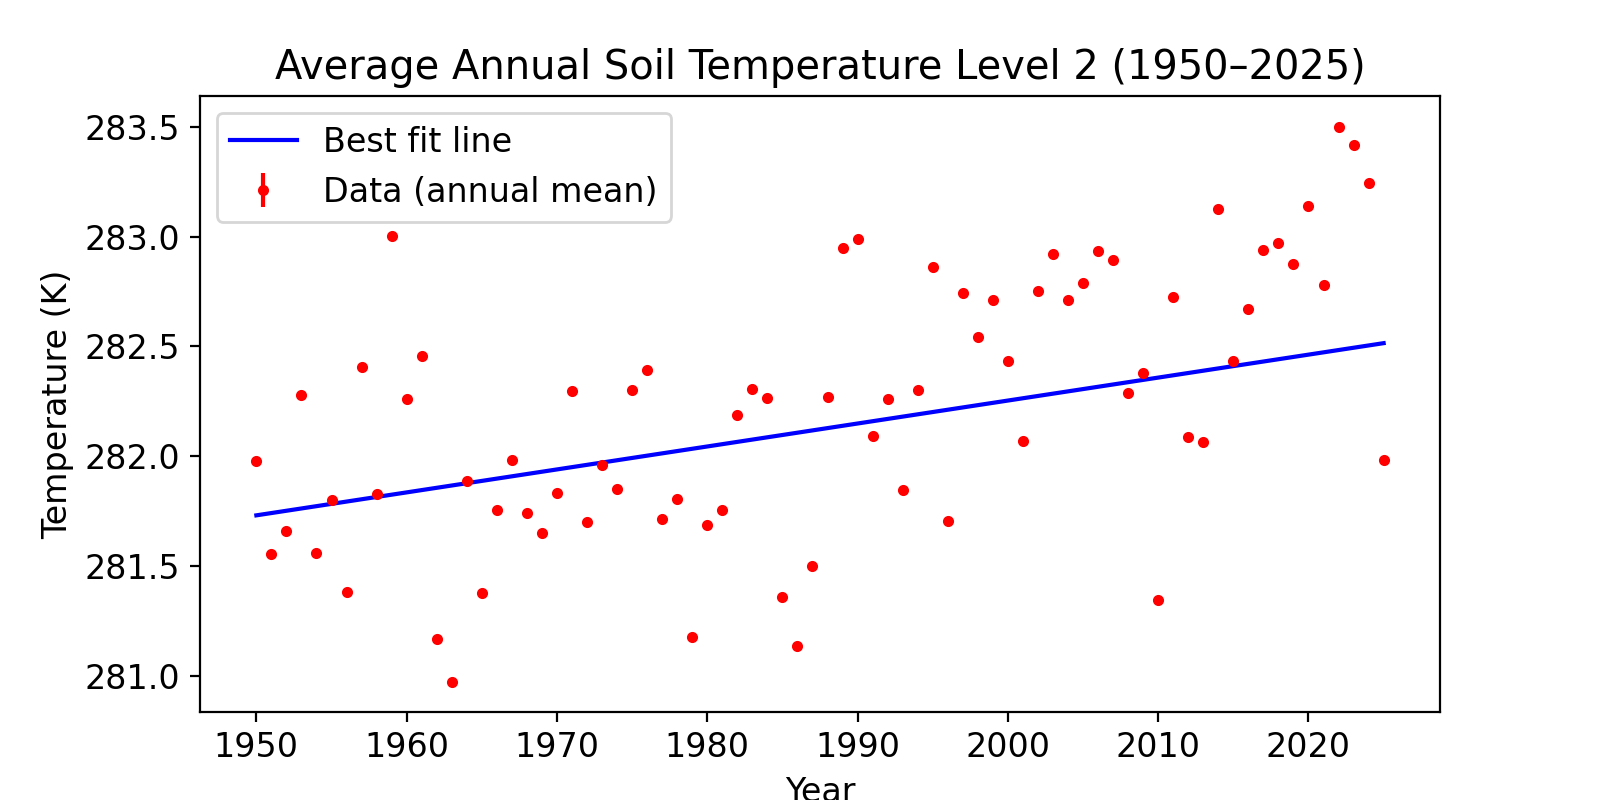

In [38]:
data_all_months = data.stl2.values  
mean_value = np.nanmean(data_all_months)

temp = block_reduce(data_all_months, 
                    block_size=(12, 1, 1), 
                    func=np.nanmean, 
                    cval=mean_value)

temp_mean = np.nanmean(temp, axis=(1, 2))
time = np.arange(1950, 2026)

def linear_model(x, m, b):
    return m * x + b


spatial_std = np.nanstd(temp, axis=(1, 2))
n_points = temp.shape[1] * temp.shape[2]
y_err = spatial_std / np.sqrt(n_points)


popt, pcov = curve_fit(linear_model, time, temp_mean, sigma=y_err, absolute_sigma=True)

m, b = popt
m_err = np.sqrt(pcov[0,0])
b_err = np.sqrt(pcov[1,1])


print(f"Slope: {m:.5f} ± {m_err:.5f} K per year")


plt.figure(figsize=(8,4))
plt.errorbar(time, temp_mean, yerr=y_err, fmt='.', color='red', label='Data (annual mean)')
plt.plot(time, linear_model(time, *popt), 'b-', label='Best fit line')
plt.xlabel('Year')
plt.ylabel('Temperature (K)')
plt.title('Average Annual Soil Temperature Level 2 (1950–2025)')
plt.legend()
plt.rcParams.update({'font.size': 12})
plt.show()

Slope: 0.01075 ± 0.00006 K per yearIntel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.



<IPython.core.display.Javascript object>


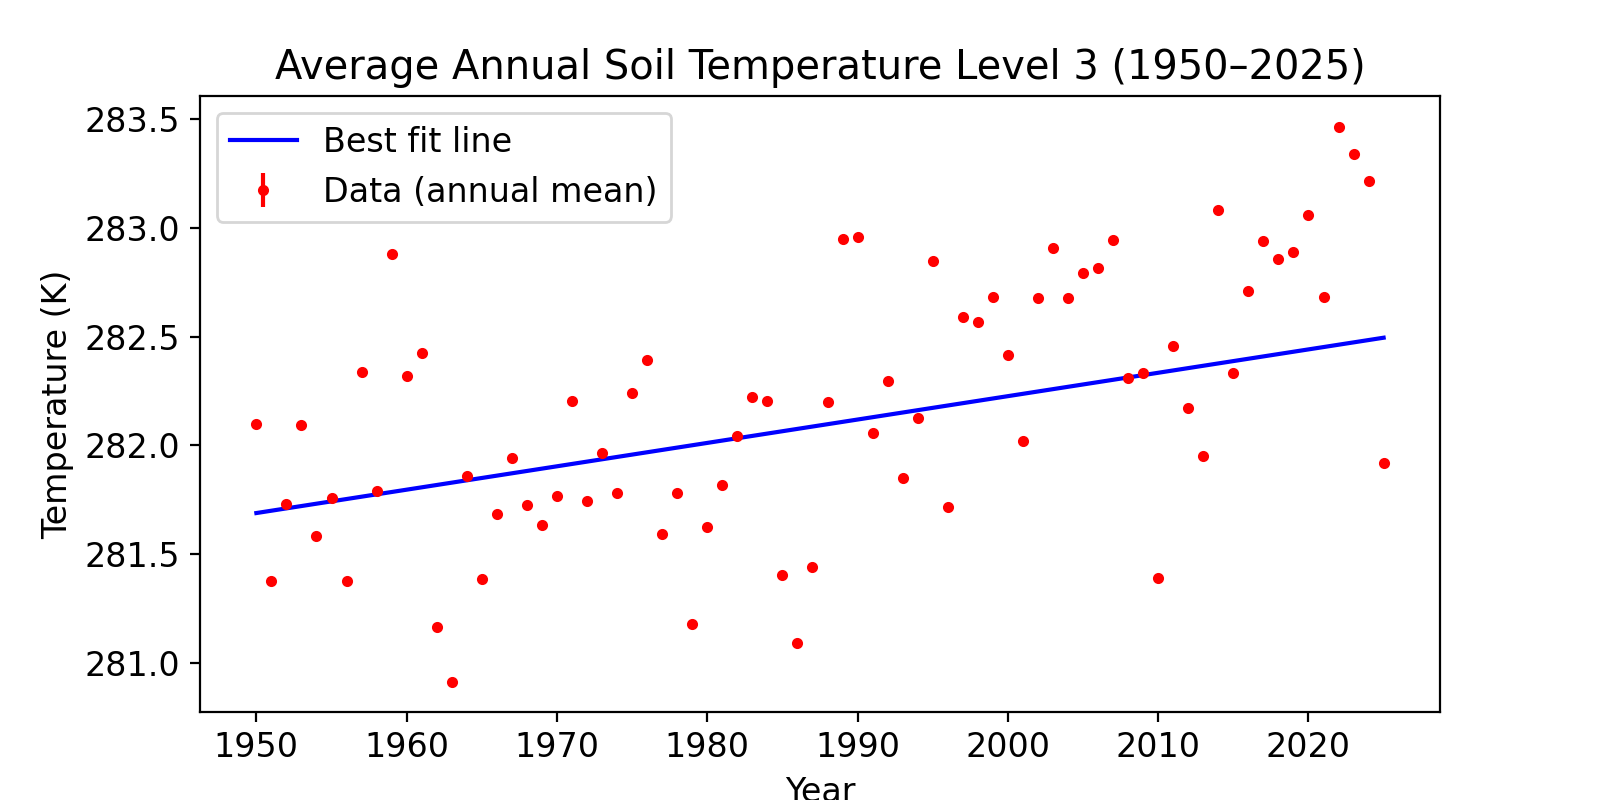

In [39]:
data_all_months = data.stl3.values  
mean_value = np.nanmean(data_all_months)

temp = block_reduce(data_all_months, 
                    block_size=(12, 1, 1), 
                    func=np.nanmean, 
                    cval=mean_value)

temp_mean = np.nanmean(temp, axis=(1, 2))
time = np.arange(1950, 2026)

def linear_model(x, m, b):
    return m * x + b


spatial_std = np.nanstd(temp, axis=(1, 2))
n_points = temp.shape[1] * temp.shape[2]
y_err = spatial_std / np.sqrt(n_points)


popt, pcov = curve_fit(linear_model, time, temp_mean, sigma=y_err, absolute_sigma=True)

m, b = popt
m_err = np.sqrt(pcov[0,0])
b_err = np.sqrt(pcov[1,1])


print(f"Slope: {m:.5f} ± {m_err:.5f} K per year")


plt.figure(figsize=(8,4))
plt.errorbar(time, temp_mean, yerr=y_err, fmt='.', color='red', label='Data (annual mean)')
plt.plot(time, linear_model(time, *popt), 'b-', label='Best fit line')
plt.xlabel('Year')
plt.ylabel('Temperature (K)')
plt.title('Average Annual Soil Temperature Level 3 (1950–2025)')
plt.legend()
plt.rcParams.update({'font.size': 12})
plt.show()

Slope: 0.01061 ± 0.00006 K per yearIntel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.



<IPython.core.display.Javascript object>


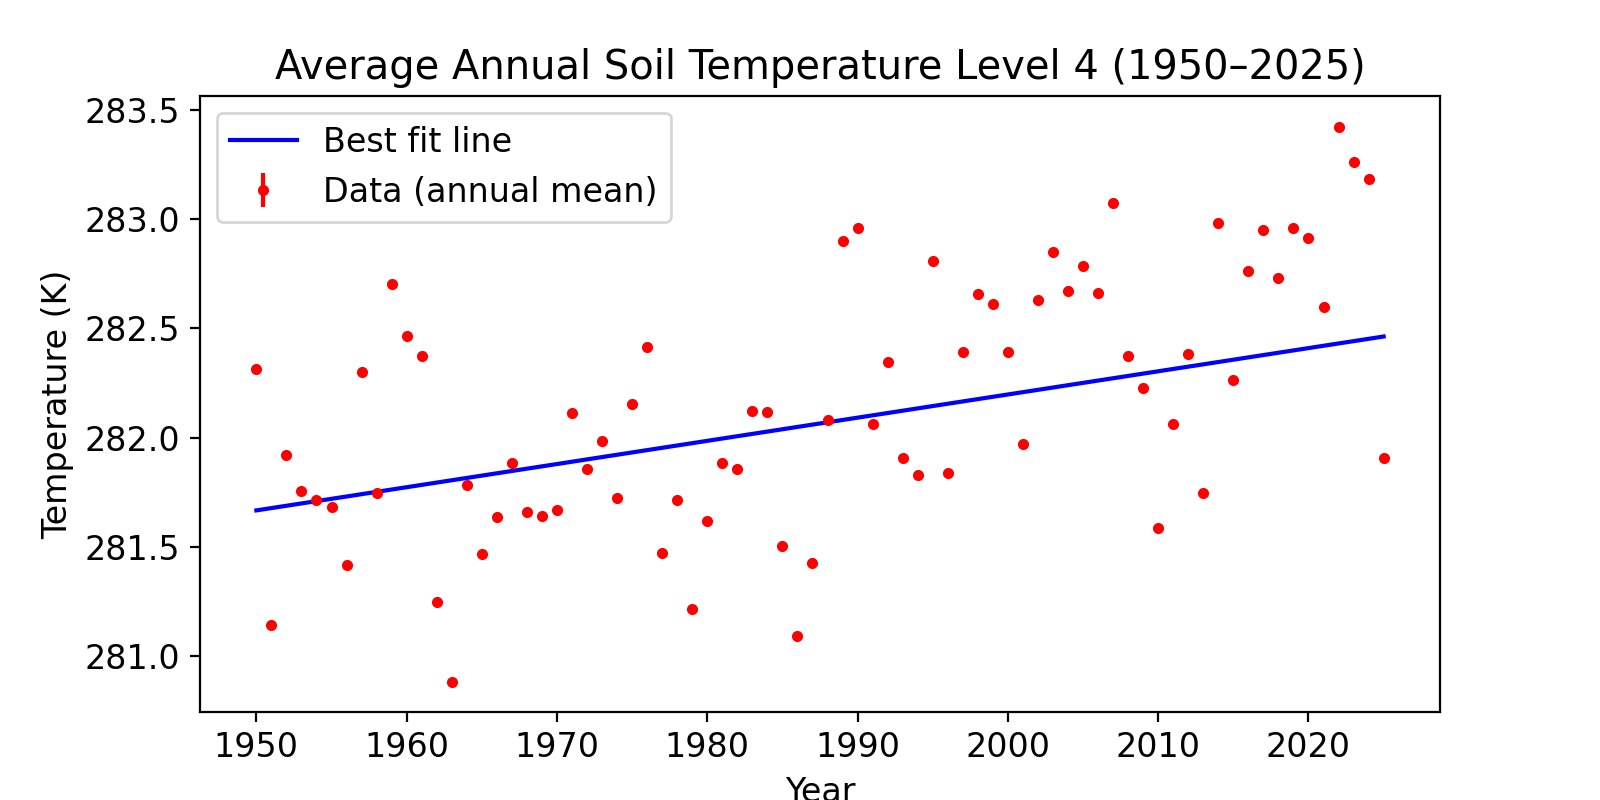

In [40]:
data_all_months = data.stl4.values  
mean_value = np.nanmean(data_all_months)

temp = block_reduce(data_all_months, 
                    block_size=(12, 1, 1), 
                    func=np.nanmean, 
                    cval=mean_value)

temp_mean = np.nanmean(temp, axis=(1, 2))
time = np.arange(1950, 2026)

def linear_model(x, m, b):
    return m * x + b


spatial_std = np.nanstd(temp, axis=(1, 2))
n_points = temp.shape[1] * temp.shape[2]
y_err = spatial_std / np.sqrt(n_points)


popt, pcov = curve_fit(linear_model, time, temp_mean, sigma=y_err, absolute_sigma=True)

m, b = popt
m_err = np.sqrt(pcov[0,0])
b_err = np.sqrt(pcov[1,1])


print(f"Slope: {m:.5f} ± {m_err:.5f} K per year")


plt.figure(figsize=(8,4))
plt.errorbar(time, temp_mean, yerr=y_err, fmt='.', color='red', label='Data (annual mean)')
plt.plot(time, linear_model(time, *popt), 'b-', label='Best fit line')
plt.xlabel('Year')
plt.ylabel('Temperature (K)')
plt.title('Average Annual Soil Temperature Level 4 (1950–2025)')
plt.legend()
plt.rcParams.update({'font.size': 12})
plt.show()

Slope: 0.00000 ± 0.00000 m per yearIntel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.



<IPython.core.display.Javascript object>


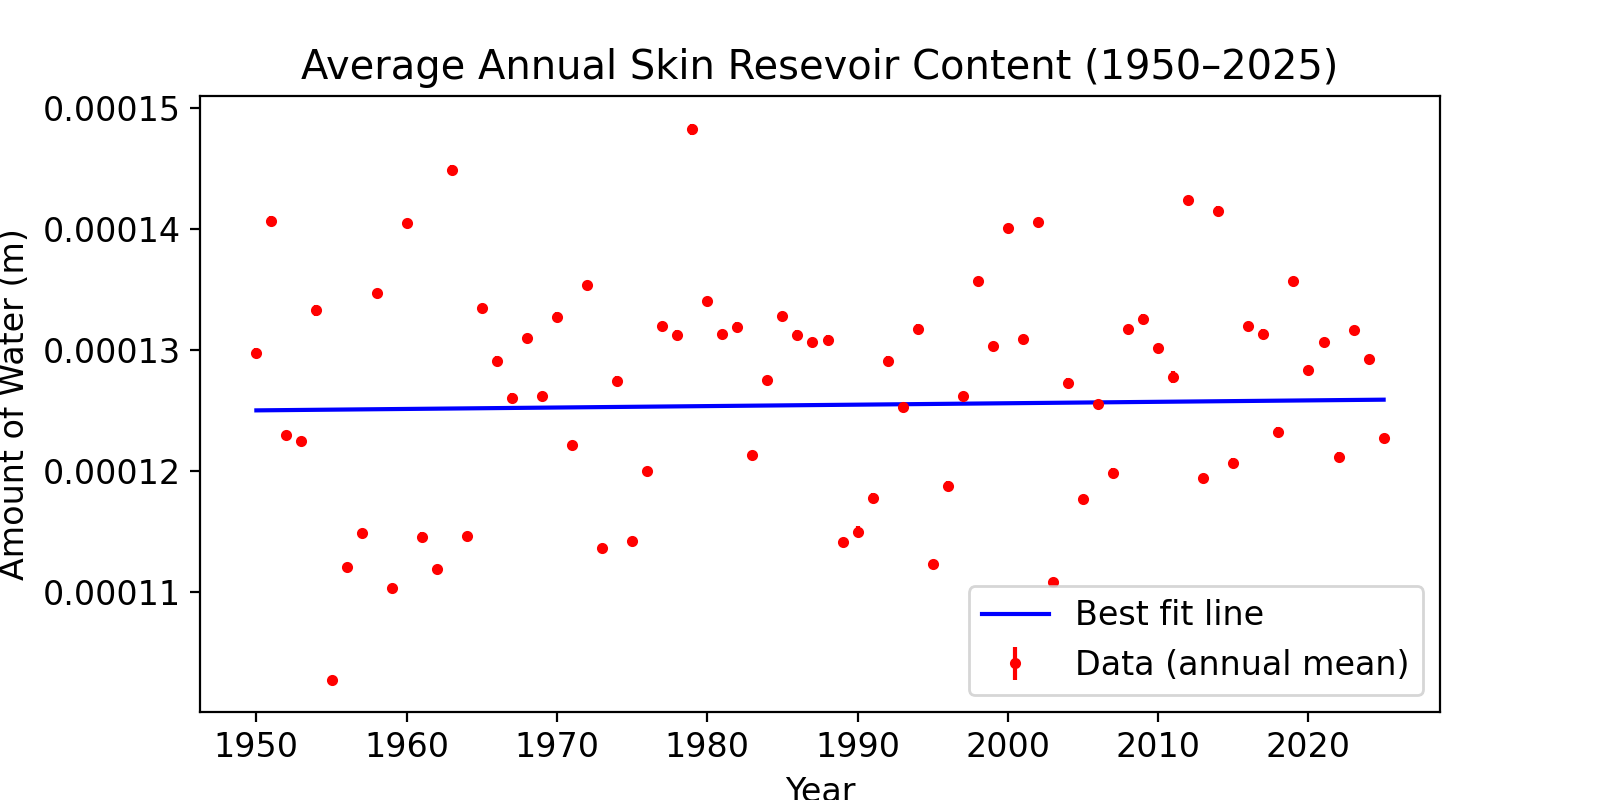

In [41]:
data_all_months = data.src.values  
mean_value = np.nanmean(data_all_months)

temp = block_reduce(data_all_months, 
                    block_size=(12, 1, 1), 
                    func=np.nanmean, 
                    cval=mean_value)

temp_mean = np.nanmean(temp, axis=(1, 2))
time = np.arange(1950, 2026)

def linear_model(x, m, b):
    return m * x + b


spatial_std = np.nanstd(temp, axis=(1, 2))
n_points = temp.shape[1] * temp.shape[2]
y_err = spatial_std / np.sqrt(n_points)


popt, pcov = curve_fit(linear_model, time, temp_mean, sigma=y_err, absolute_sigma=True)

m, b = popt
m_err = np.sqrt(pcov[0,0])
b_err = np.sqrt(pcov[1,1])


print(f"Slope: {m:.5f} ± {m_err:.5f} m per year")


plt.figure(figsize=(8,4))
plt.errorbar(time, temp_mean, yerr=y_err, fmt='.', color='red', label='Data (annual mean)')
plt.plot(time, linear_model(time, *popt), 'b-', label='Best fit line')
plt.xlabel('Year')
plt.ylabel('Amount of Water (m)')
plt.title('Average Annual Skin Resevoir Content (1950–2025)')
plt.legend()
plt.rcParams.update({'font.size': 12})
plt.show()

Slope: 0.00004 ± 0.00000 m$^3$ m$^-3$ per yearIntel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.



<IPython.core.display.Javascript object>


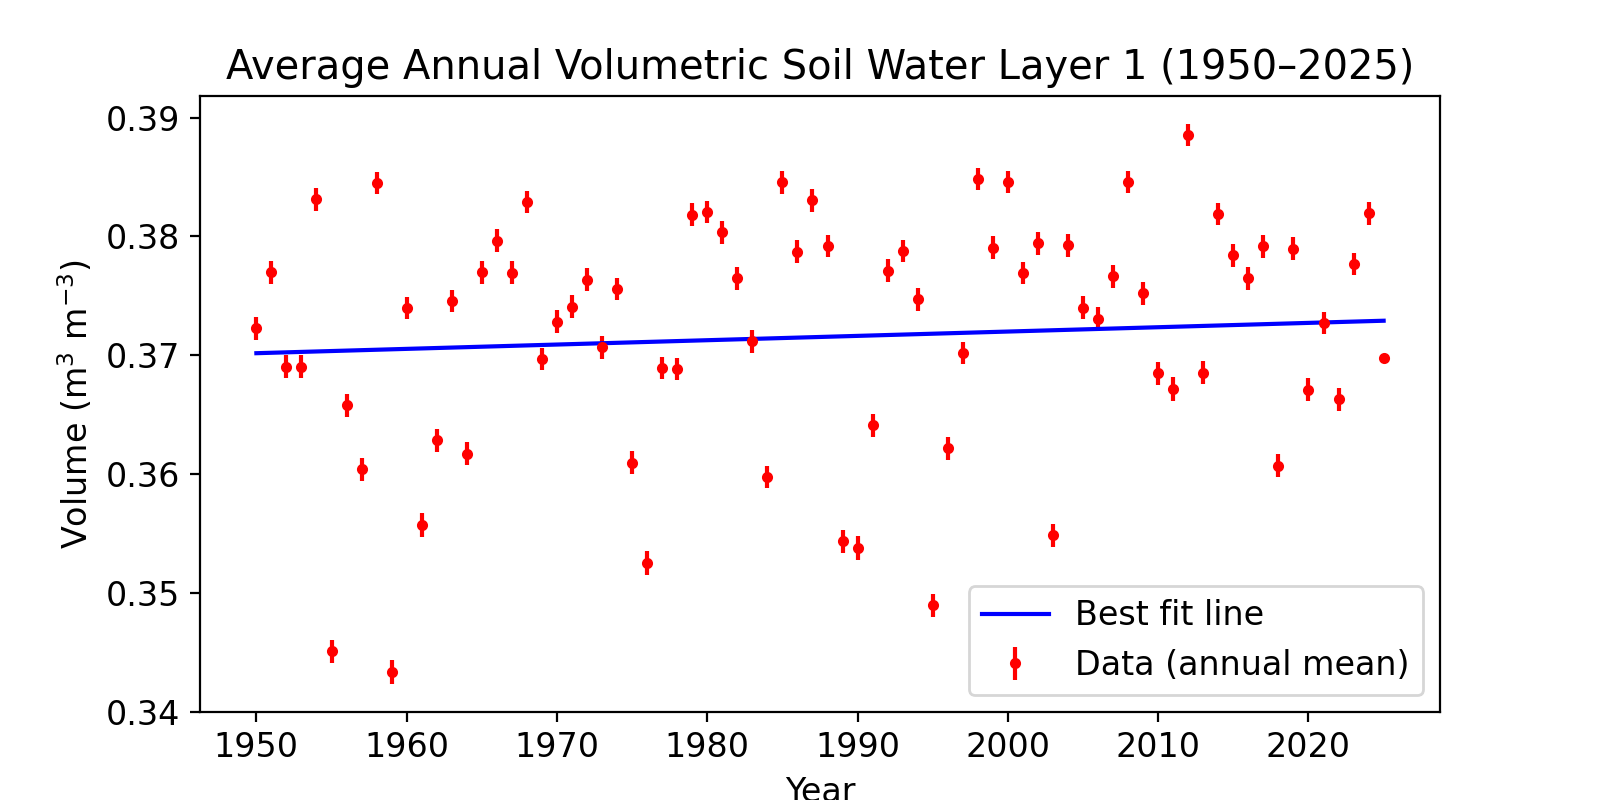

In [42]:
data_all_months = data.swvl1.values  
mean_value = np.nanmean(data_all_months)

temp = block_reduce(data_all_months, 
                    block_size=(12, 1, 1), 
                    func=np.nanmean, 
                    cval=mean_value)

temp_mean = np.nanmean(temp, axis=(1, 2))
time = np.arange(1950, 2026)

def linear_model(x, m, b):
    return m * x + b


spatial_std = np.nanstd(temp, axis=(1, 2))
n_points = temp.shape[1] * temp.shape[2]
y_err = spatial_std / np.sqrt(n_points)


popt, pcov = curve_fit(linear_model, time, temp_mean, sigma=y_err, absolute_sigma=True)

m, b = popt
m_err = np.sqrt(pcov[0,0])
b_err = np.sqrt(pcov[1,1])


print(f"Slope: {m:.5f} ± {m_err:.5f} m$^3$ m$^{-3}$ per year")


plt.figure(figsize=(8,4))
plt.errorbar(time, temp_mean, yerr=y_err, fmt='.', color='red', label='Data (annual mean)')
plt.plot(time, linear_model(time, *popt), 'b-', label='Best fit line')
plt.xlabel('Year')
plt.ylabel('Volume (m$^3$ m$^{-3}$)')
plt.title('Average Annual Volumetric Soil Water Layer 1 (1950–2025)')
plt.legend()
plt.rcParams.update({'font.size': 12})
plt.show()

Slope: 0.00005 ± 0.00000 m$^3$ m$^-3$ per yearIntel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.



<IPython.core.display.Javascript object>


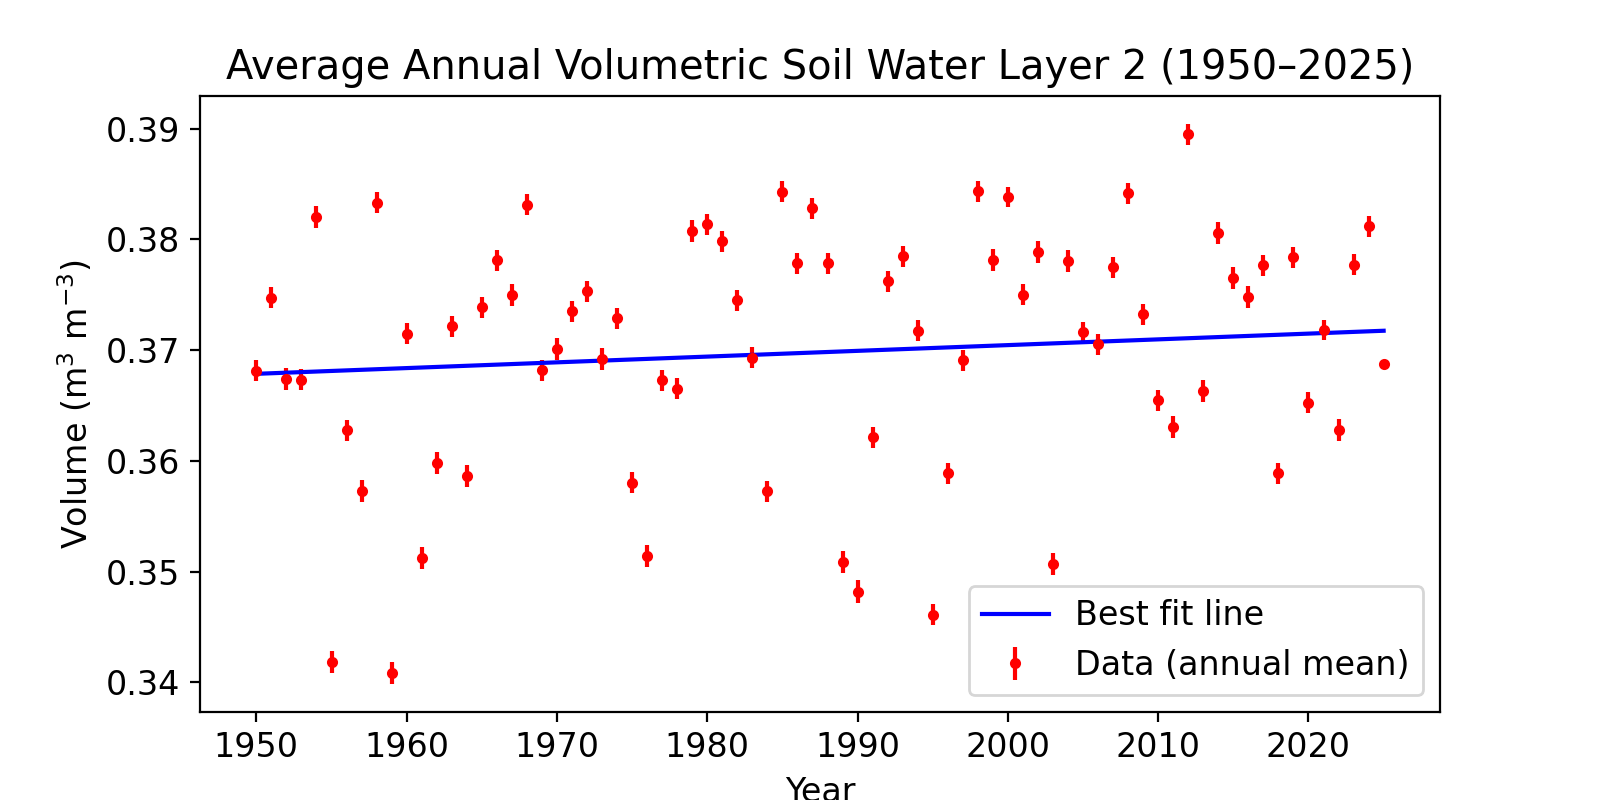

In [43]:
data_all_months = data.swvl2.values  
mean_value = np.nanmean(data_all_months)

temp = block_reduce(data_all_months, 
                    block_size=(12, 1, 1), 
                    func=np.nanmean, 
                    cval=mean_value)

temp_mean = np.nanmean(temp, axis=(1, 2))
time = np.arange(1950, 2026)

def linear_model(x, m, b):
    return m * x + b


spatial_std = np.nanstd(temp, axis=(1, 2))
n_points = temp.shape[1] * temp.shape[2]
y_err = spatial_std / np.sqrt(n_points)


popt, pcov = curve_fit(linear_model, time, temp_mean, sigma=y_err, absolute_sigma=True)

m, b = popt
m_err = np.sqrt(pcov[0,0])
b_err = np.sqrt(pcov[1,1])


print(f"Slope: {m:.5f} ± {m_err:.5f} m$^3$ m$^{-3}$ per year")


plt.figure(figsize=(8,4))
plt.errorbar(time, temp_mean, yerr=y_err, fmt='.', color='red', label='Data (annual mean)')
plt.plot(time, linear_model(time, *popt), 'b-', label='Best fit line')
plt.xlabel('Year')
plt.ylabel('Volume (m$^3$ m$^{-3}$)')
plt.title('Average Annual Volumetric Soil Water Layer 2 (1950–2025)')
plt.legend()
plt.rcParams.update({'font.size': 12})
plt.show()

Slope: 0.00007 ± 0.00000 m$^3$ m$^-3$ per yearIntel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.



<IPython.core.display.Javascript object>


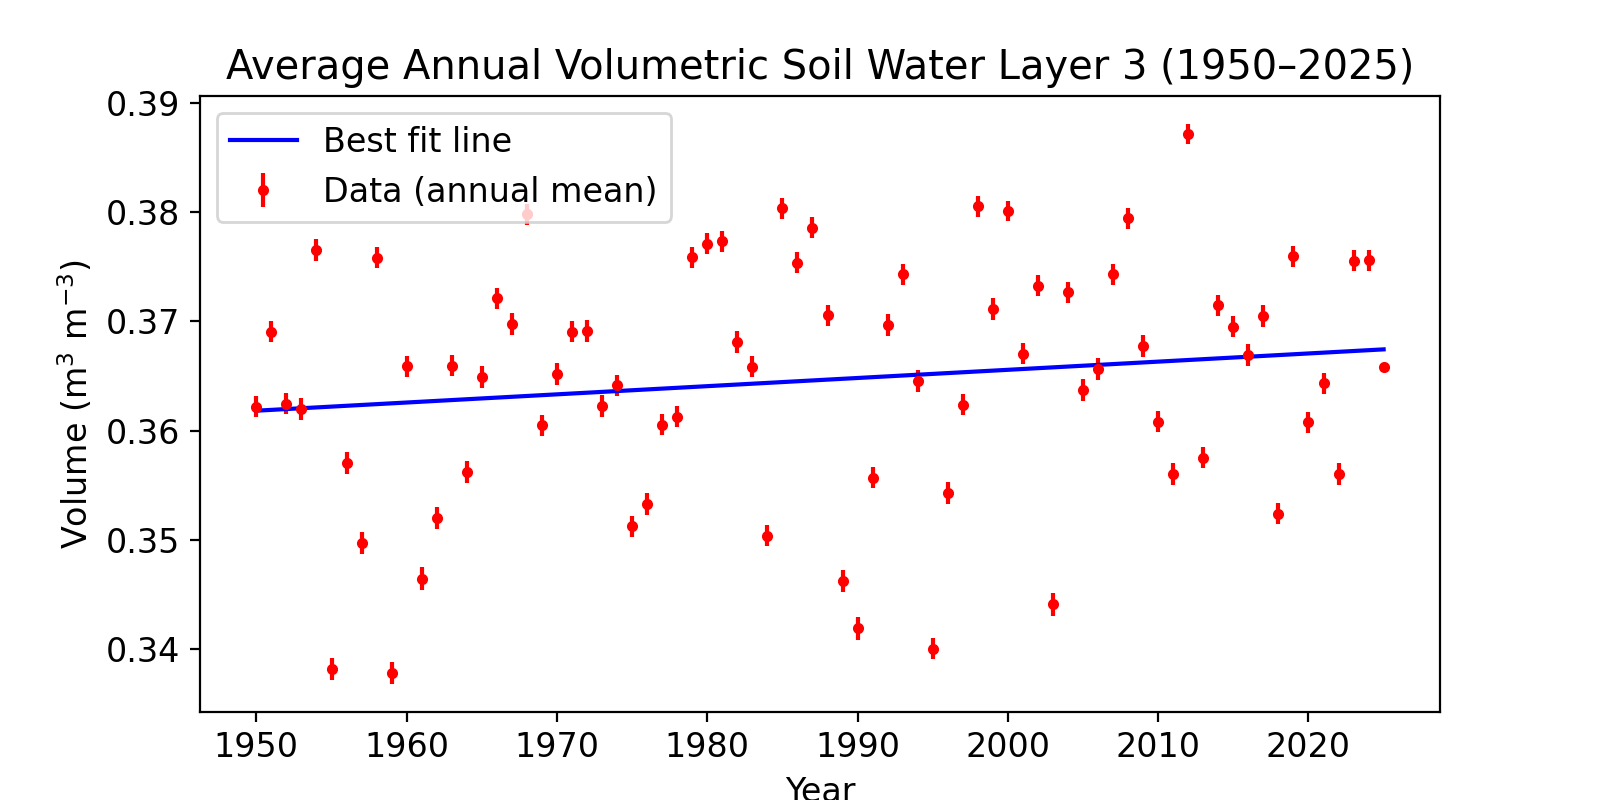

In [44]:
data_all_months = data.swvl3.values  
mean_value = np.nanmean(data_all_months)

temp = block_reduce(data_all_months, 
                    block_size=(12, 1, 1), 
                    func=np.nanmean, 
                    cval=mean_value)

temp_mean = np.nanmean(temp, axis=(1, 2))
time = np.arange(1950, 2026)

def linear_model(x, m, b):
    return m * x + b


spatial_std = np.nanstd(temp, axis=(1, 2))
n_points = temp.shape[1] * temp.shape[2]
y_err = spatial_std / np.sqrt(n_points)


popt, pcov = curve_fit(linear_model, time, temp_mean, sigma=y_err, absolute_sigma=True)

m, b = popt
m_err = np.sqrt(pcov[0,0])
b_err = np.sqrt(pcov[1,1])


print(f"Slope: {m:.5f} ± {m_err:.5f} m$^3$ m$^{-3}$ per year")


plt.figure(figsize=(8,4))
plt.errorbar(time, temp_mean, yerr=y_err, fmt='.', color='red', label='Data (annual mean)')
plt.plot(time, linear_model(time, *popt), 'b-', label='Best fit line')
plt.xlabel('Year')
plt.ylabel('Volume (m$^3$ m$^{-3}$)')
plt.title('Average Annual Volumetric Soil Water Layer 3 (1950–2025)')
plt.legend()
plt.rcParams.update({'font.size': 12})
plt.show()

Slope: 0.00011 ± 0.00000 m$^3$ m$^-3$ per yearIntel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.



<IPython.core.display.Javascript object>


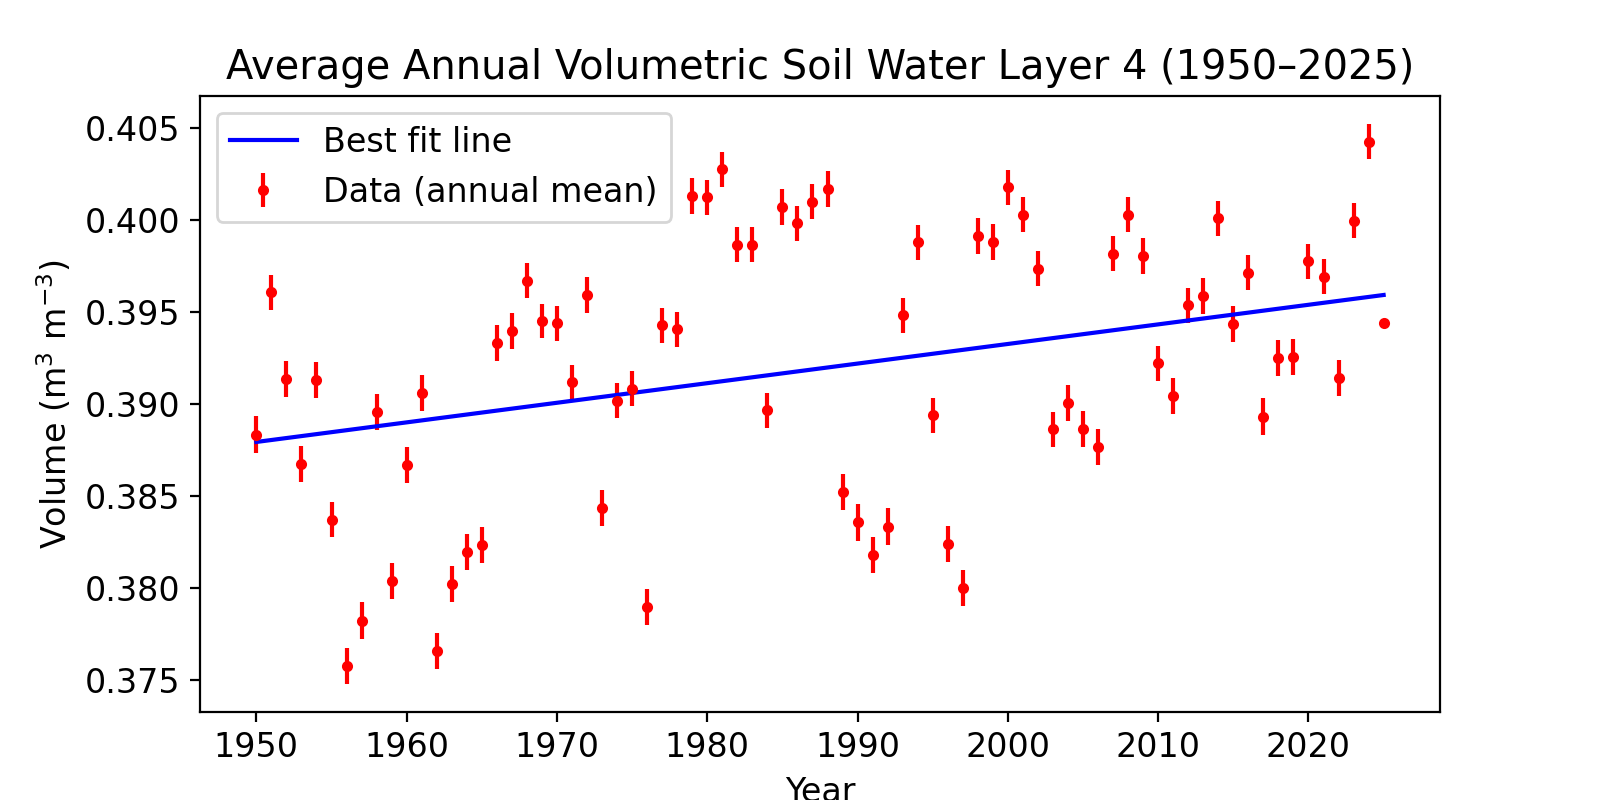

In [45]:
data_all_months = data.swvl4.values  
mean_value = np.nanmean(data_all_months)

temp = block_reduce(data_all_months, 
                    block_size=(12, 1, 1), 
                    func=np.nanmean, 
                    cval=mean_value)

temp_mean = np.nanmean(temp, axis=(1, 2))
time = np.arange(1950, 2026)

def linear_model(x, m, b):
    return m * x + b


spatial_std = np.nanstd(temp, axis=(1, 2))
n_points = temp.shape[1] * temp.shape[2]
y_err = spatial_std / np.sqrt(n_points)


popt, pcov = curve_fit(linear_model, time, temp_mean, sigma=y_err, absolute_sigma=True)

m, b = popt
m_err = np.sqrt(pcov[0,0])
b_err = np.sqrt(pcov[1,1])


print(f"Slope: {m:.5f} ± {m_err:.5f} m$^3$ m$^{-3}$ per year")


plt.figure(figsize=(8,4))
plt.errorbar(time, temp_mean, yerr=y_err, fmt='.', color='red', label='Data (annual mean)')
plt.plot(time, linear_model(time, *popt), 'b-', label='Best fit line')
plt.xlabel('Year')
plt.ylabel('Volume (m$^3$ m$^{-3}$)')
plt.title('Average Annual Volumetric Soil Water Layer 4 (1950–2025)')
plt.legend()
plt.rcParams.update({'font.size': 12})
plt.show()

Slope: 0.00169 ± 0.00001 ms$^-1$ per yearIntel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.



<IPython.core.display.Javascript object>


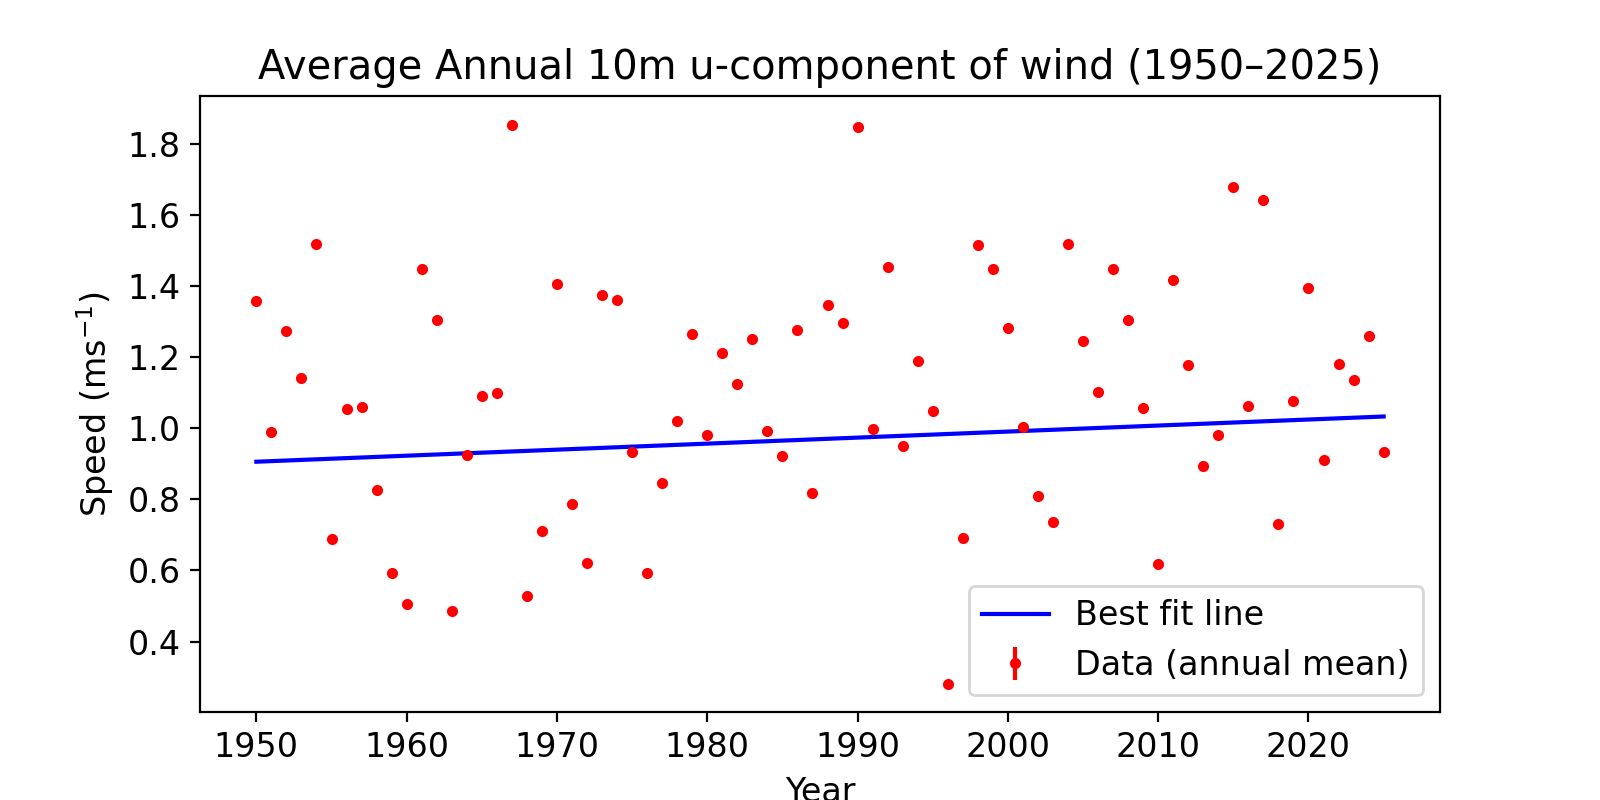

In [46]:
data_all_months = data.u10.values  
mean_value = np.nanmean(data_all_months)

temp = block_reduce(data_all_months, 
                    block_size=(12, 1, 1), 
                    func=np.nanmean, 
                    cval=mean_value)

temp_mean = np.nanmean(temp, axis=(1, 2))
time = np.arange(1950, 2026)

def linear_model(x, m, b):
    return m * x + b


spatial_std = np.nanstd(temp, axis=(1, 2))
n_points = temp.shape[1] * temp.shape[2]
y_err = spatial_std / np.sqrt(n_points)


popt, pcov = curve_fit(linear_model, time, temp_mean, sigma=y_err, absolute_sigma=True)

m, b = popt
m_err = np.sqrt(pcov[0,0])
b_err = np.sqrt(pcov[1,1])


print(f"Slope: {m:.5f} ± {m_err:.5f} ms$^{-1}$ per year")


plt.figure(figsize=(8,4))
plt.errorbar(time, temp_mean, yerr=y_err, fmt='.', color='red', label='Data (annual mean)')
plt.plot(time, linear_model(time, *popt), 'b-', label='Best fit line')
plt.xlabel('Year')
plt.ylabel('Speed (ms$^{-1}$)')
plt.title('Average Annual 10m u-component of wind (1950–2025)')
plt.legend()
plt.rcParams.update({'font.size': 12})
plt.show()

Slope: 0.00248 ± 0.00001 ms$^-1$ per yearIntel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.



<IPython.core.display.Javascript object>


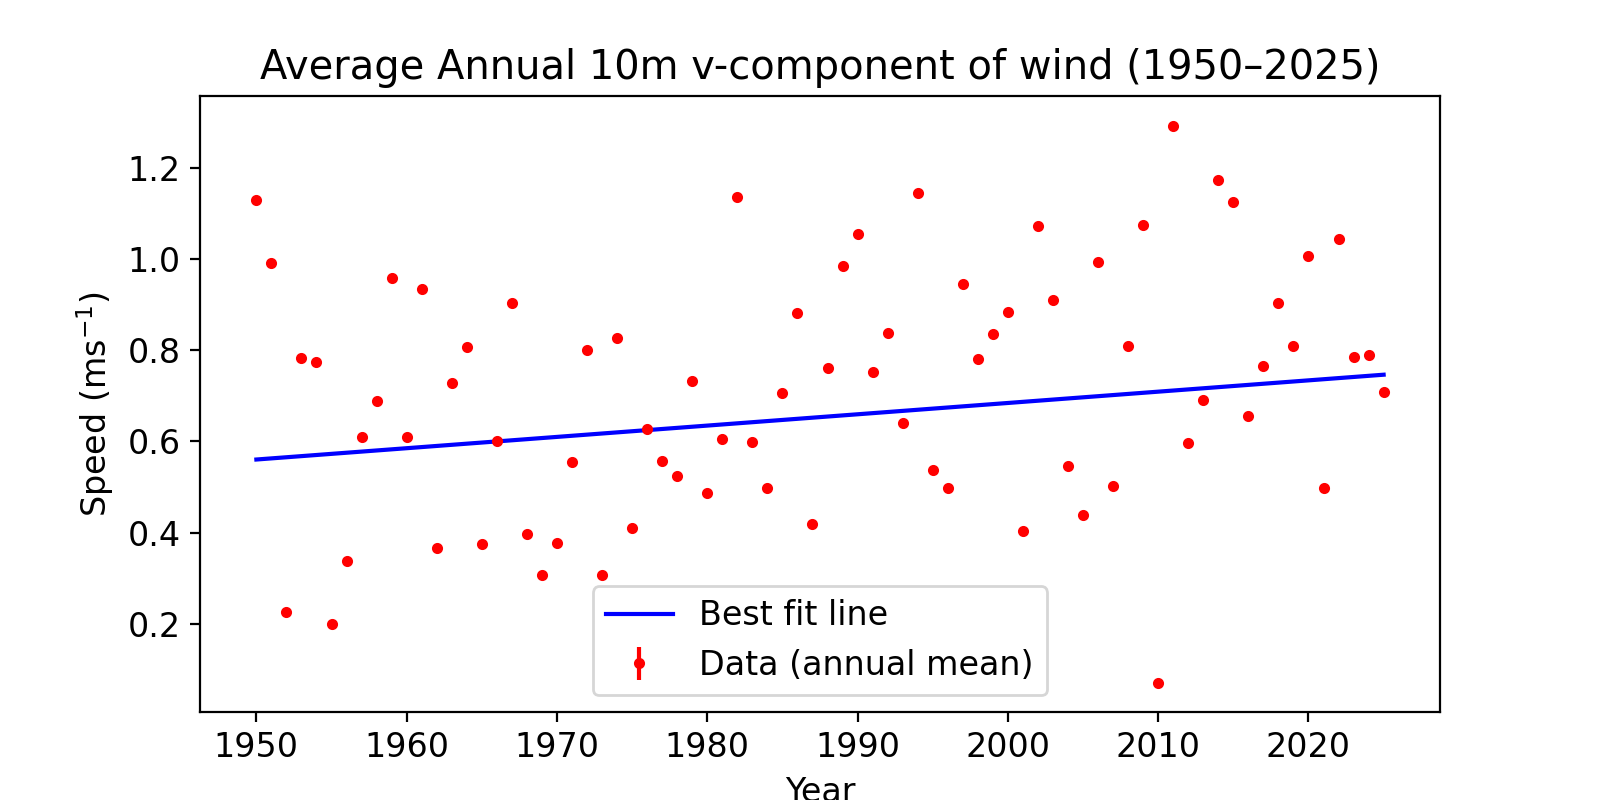

In [47]:
data_all_months = data.v10.values  
mean_value = np.nanmean(data_all_months)

temp = block_reduce(data_all_months, 
                    block_size=(12, 1, 1), 
                    func=np.nanmean, 
                    cval=mean_value)

temp_mean = np.nanmean(temp, axis=(1, 2))
time = np.arange(1950, 2026)

def linear_model(x, m, b):
    return m * x + b


spatial_std = np.nanstd(temp, axis=(1, 2))
n_points = temp.shape[1] * temp.shape[2]
y_err = spatial_std / np.sqrt(n_points)


popt, pcov = curve_fit(linear_model, time, temp_mean, sigma=y_err, absolute_sigma=True)

m, b = popt
m_err = np.sqrt(pcov[0,0])
b_err = np.sqrt(pcov[1,1])


print(f"Slope: {m:.5f} ± {m_err:.5f} ms$^{-1}$ per year")


plt.figure(figsize=(8,4))
plt.errorbar(time, temp_mean, yerr=y_err, fmt='.', color='red', label='Data (annual mean)')
plt.plot(time, linear_model(time, *popt), 'b-', label='Best fit line')
plt.xlabel('Year')
plt.ylabel('Speed (ms$^{-1}$)')
plt.title('Average Annual 10m v-component of wind (1950–2025)')
plt.legend()
plt.rcParams.update({'font.size': 12})
plt.show()

Slope: 0.22991 ± 0.05432 Pa per yearIntel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.



<IPython.core.display.Javascript object>


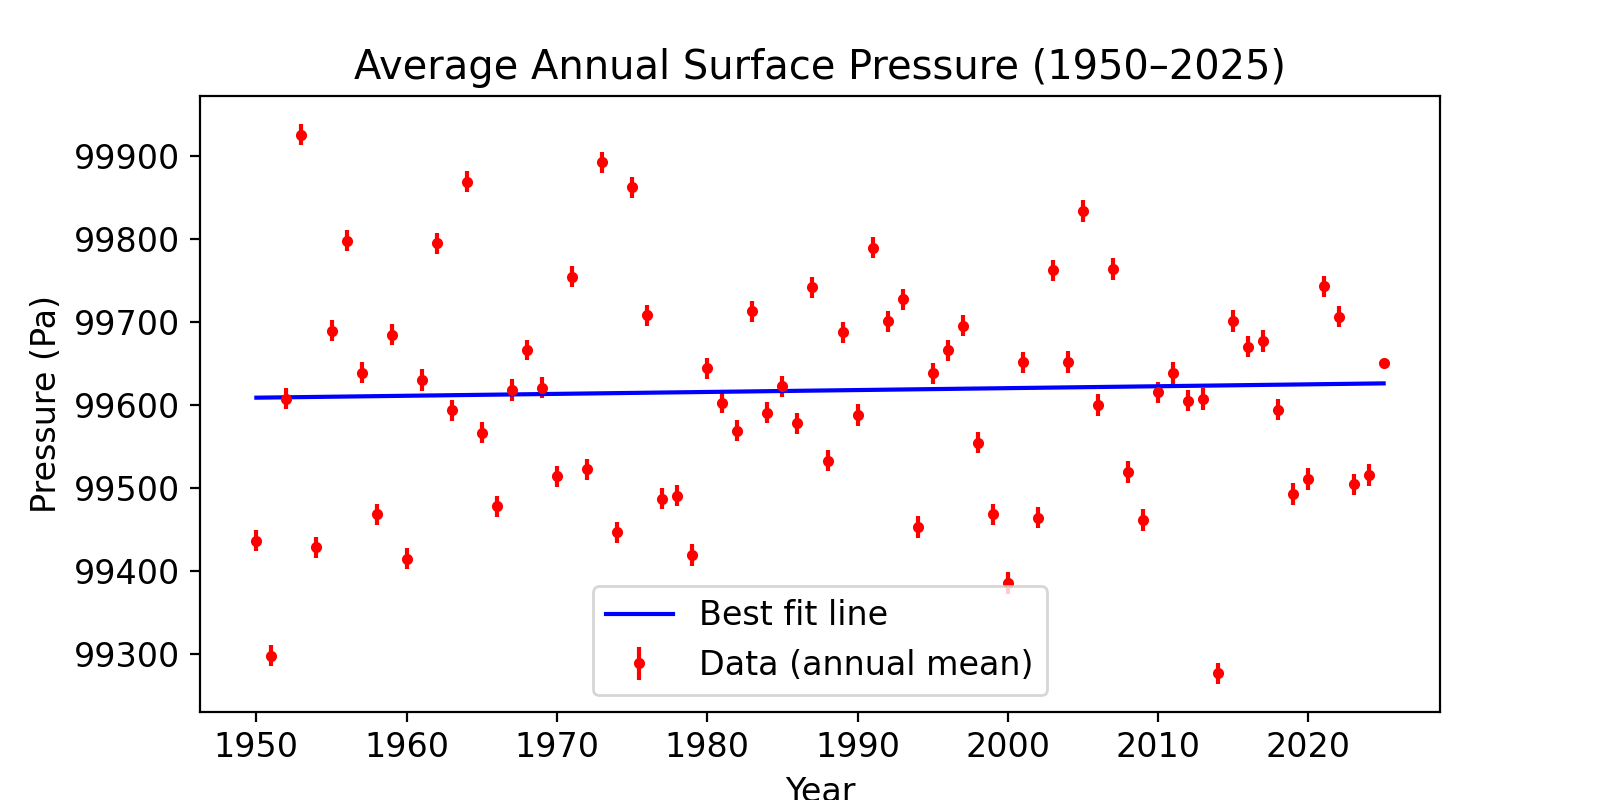

In [48]:
data_all_months = data.sp.values  
mean_value = np.nanmean(data_all_months)

temp = block_reduce(data_all_months, 
                    block_size=(12, 1, 1), 
                    func=np.nanmean, 
                    cval=mean_value)

temp_mean = np.nanmean(temp, axis=(1, 2))
time = np.arange(1950, 2026)

def linear_model(x, m, b):
    return m * x + b


spatial_std = np.nanstd(temp, axis=(1, 2))
n_points = temp.shape[1] * temp.shape[2]
y_err = spatial_std / np.sqrt(n_points)


popt, pcov = curve_fit(linear_model, time, temp_mean, sigma=y_err, absolute_sigma=True)

m, b = popt
m_err = np.sqrt(pcov[0,0])
b_err = np.sqrt(pcov[1,1])


print(f"Slope: {m:.5f} ± {m_err:.5f} Pa per year")


plt.figure(figsize=(8,4))
plt.errorbar(time, temp_mean, yerr=y_err, fmt='.', color='red', label='Data (annual mean)')
plt.plot(time, linear_model(time, *popt), 'b-', label='Best fit line')
plt.xlabel('Year')
plt.ylabel('Pressure (Pa)')
plt.title('Average Annual Surface Pressure (1950–2025)')
plt.legend()
plt.rcParams.update({'font.size': 12})
plt.show()

Slope: 0.00000 ± 0.00000 m per yearIntel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.



<IPython.core.display.Javascript object>


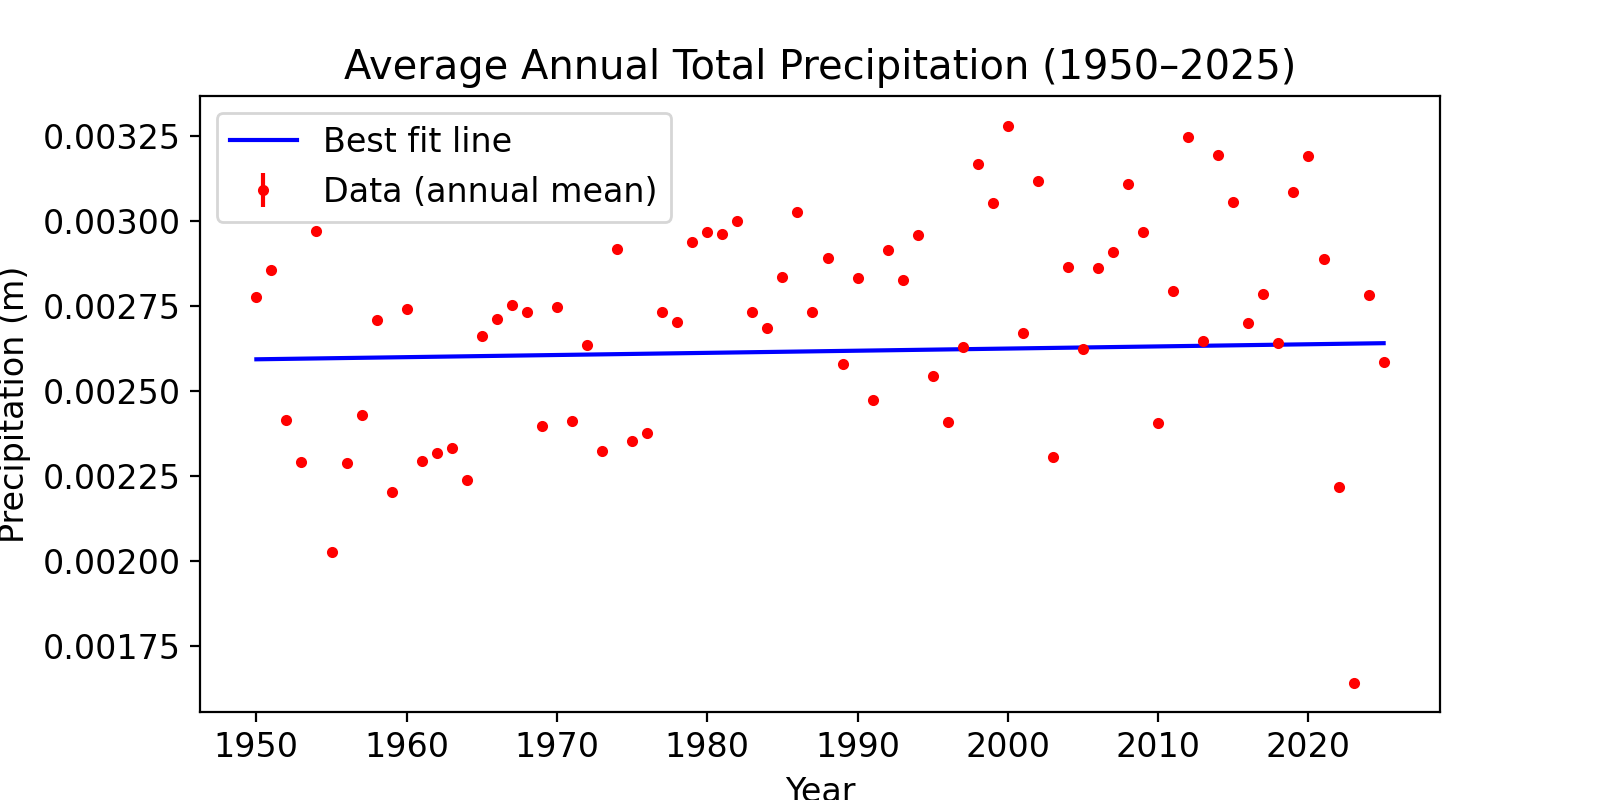

In [49]:
data_all_months = data.tp.values  
mean_value = np.nanmean(data_all_months)

temp = block_reduce(data_all_months, 
                    block_size=(12, 1, 1), 
                    func=np.nanmean, 
                    cval=mean_value)

temp_mean = np.nanmean(temp, axis=(1, 2))
time = np.arange(1950, 2026)

def linear_model(x, m, b):
    return m * x + b


spatial_std = np.nanstd(temp, axis=(1, 2))
n_points = temp.shape[1] * temp.shape[2]
y_err = spatial_std / np.sqrt(n_points)


popt, pcov = curve_fit(linear_model, time, temp_mean, sigma=y_err, absolute_sigma=True)

m, b = popt
m_err = np.sqrt(pcov[0,0])
b_err = np.sqrt(pcov[1,1])


print(f"Slope: {m:.5f} ± {m_err:.5f} m per year")


plt.figure(figsize=(8,4))
plt.errorbar(time, temp_mean, yerr=y_err, fmt='.', color='red', label='Data (annual mean)')
plt.plot(time, linear_model(time, *popt), 'b-', label='Best fit line')
plt.xlabel('Year')
plt.ylabel('Precipitation (m)')
plt.title('Average Annual Total Precipitation (1950–2025)')
plt.legend()
plt.rcParams.update({'font.size': 12})
plt.show()

## Spring 

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


<IPython.core.display.Javascript object>


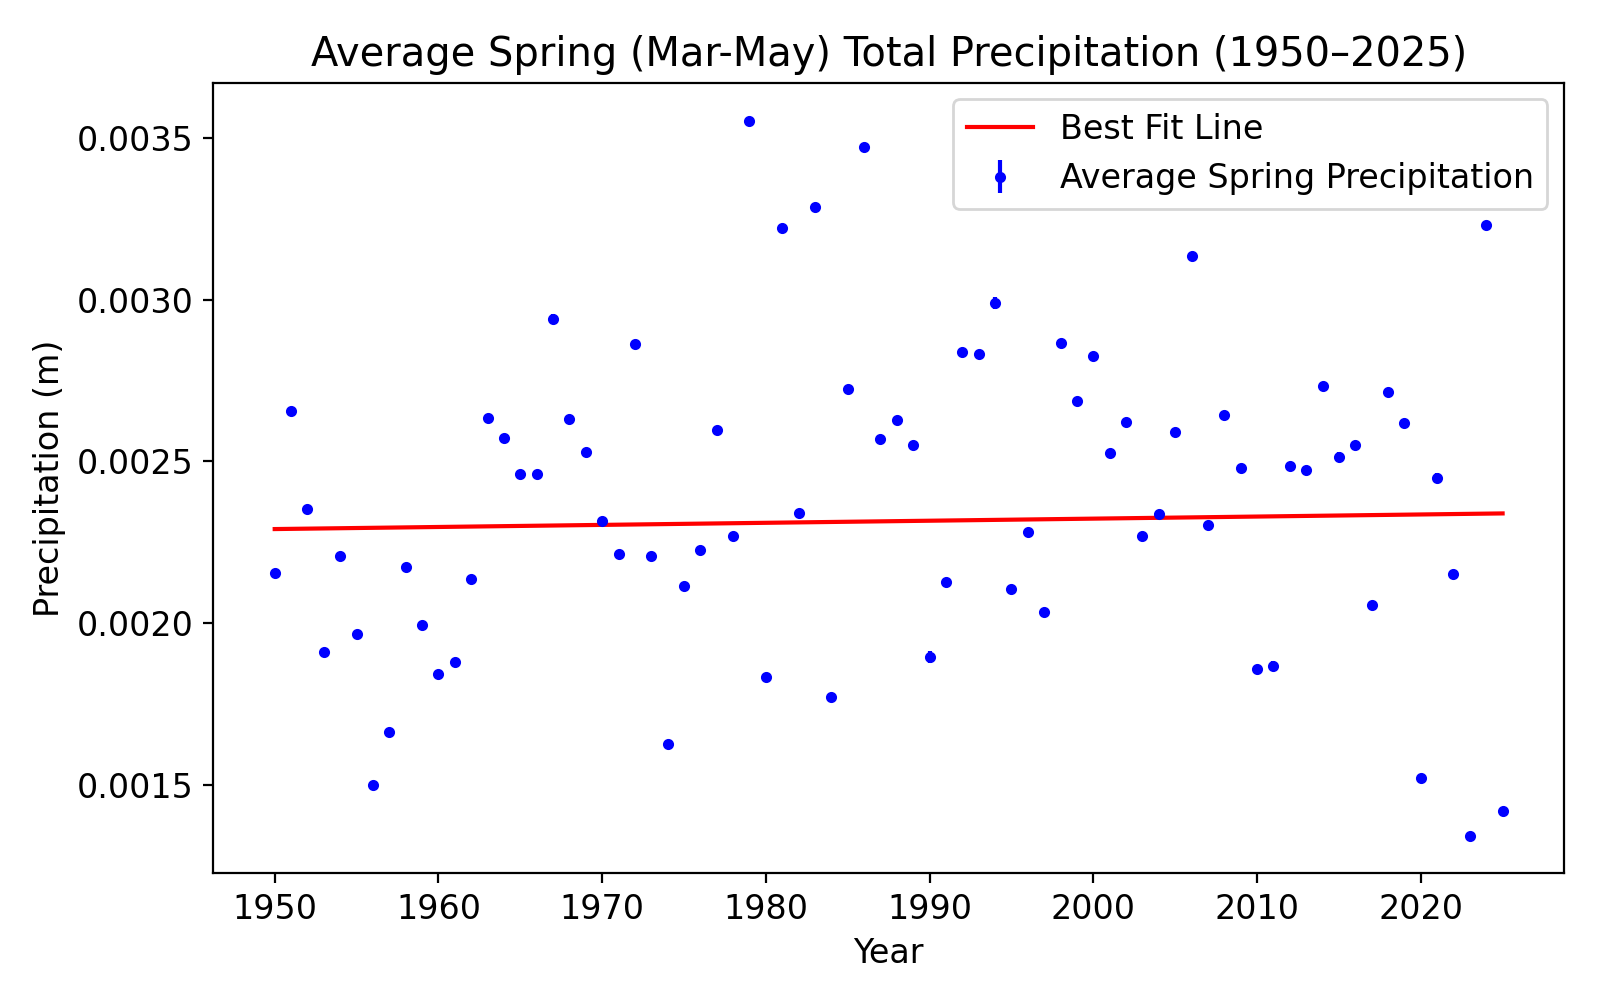

Slope: 6.44856e-07 ± 4.44129e-08 m/year
March–May 2025 average total precipitation: 1.42 mm


In [50]:
import xarray as xr

data = xr.open_dataset(r"/Users/anvijoy/Desktop/Anvi/Uni Notes/Internal Placement/data_stream-moda-2.nc")


tp_data = data.tp  
time_values = data.valid_time.values 


months = np.array([(t.astype('datetime64[M]').item().month) for t in time_values])
years = np.array([t.astype('datetime64[Y]').astype(int) + 1970 for t in time_values])


unique_years = np.unique(years)
mam_years = []
mam_means = []
mam_stds = []

for yr in unique_years:
    mask = (years == yr) & (np.isin(months, [3, 4, 5]))
    if np.sum(mask) == 3:  
        tp_mam = tp_data.isel(valid_time=np.where(mask)[0])
        mean_val = tp_mam.mean(dim=("valid_time", "latitude", "longitude"), skipna=True).values
        std_val = tp_mam.std(dim=("valid_time", "latitude", "longitude"), skipna=True).values
        n_grid = tp_mam.sizes["latitude"] * tp_mam.sizes["longitude"]
        error = std_val / np.sqrt(n_grid)

        mam_years.append(yr)
        mam_means.append(mean_val)
        mam_stds.append(error)

mam_years = np.array(mam_years)
mam_means = np.array(mam_means)
mam_stds = np.array(mam_stds)

def linear_model(x, m, b):
    return m * x + b

popt, pcov = curve_fit(linear_model, mam_years, mam_means, sigma=mam_stds, absolute_sigma=True)
slope, intercept = popt
slope_err = np.sqrt(pcov[0, 0])

plt.figure(figsize=(8, 5))
plt.errorbar(mam_years, mam_means, yerr=mam_stds, fmt='.', color='blue', label='Average Spring Precipitation')
plt.plot(mam_years, linear_model(mam_years, *popt), 'r-', label='Best Fit Line')
plt.xlabel('Year')
plt.ylabel('Precipitation (m)')
plt.title('Average Spring (Mar-May) Total Precipitation (1950–2025)')
plt.legend()
plt.tight_layout()
plt.show()


print(f"Slope: {slope:.5e} ± {slope_err:.5e} m/year")


mask_2025_mam = (years == 2025) & (np.isin(months, [3, 4, 5]))
if np.sum(mask_2025_mam) == 3:
    tp_mam_2025 = tp_data.isel(valid_time=np.where(mask_2025_mam)[0])
    tp_2025_mean_m = tp_mam_2025.mean(dim=("valid_time", "latitude", "longitude"), skipna=True).values
    tp_2025_mean_mm = tp_2025_mean_m * 1000  
    print(f"March–May 2025 average total precipitation: {tp_2025_mean_mm:.2f} mm")



## Winter 

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


<IPython.core.display.Javascript object>


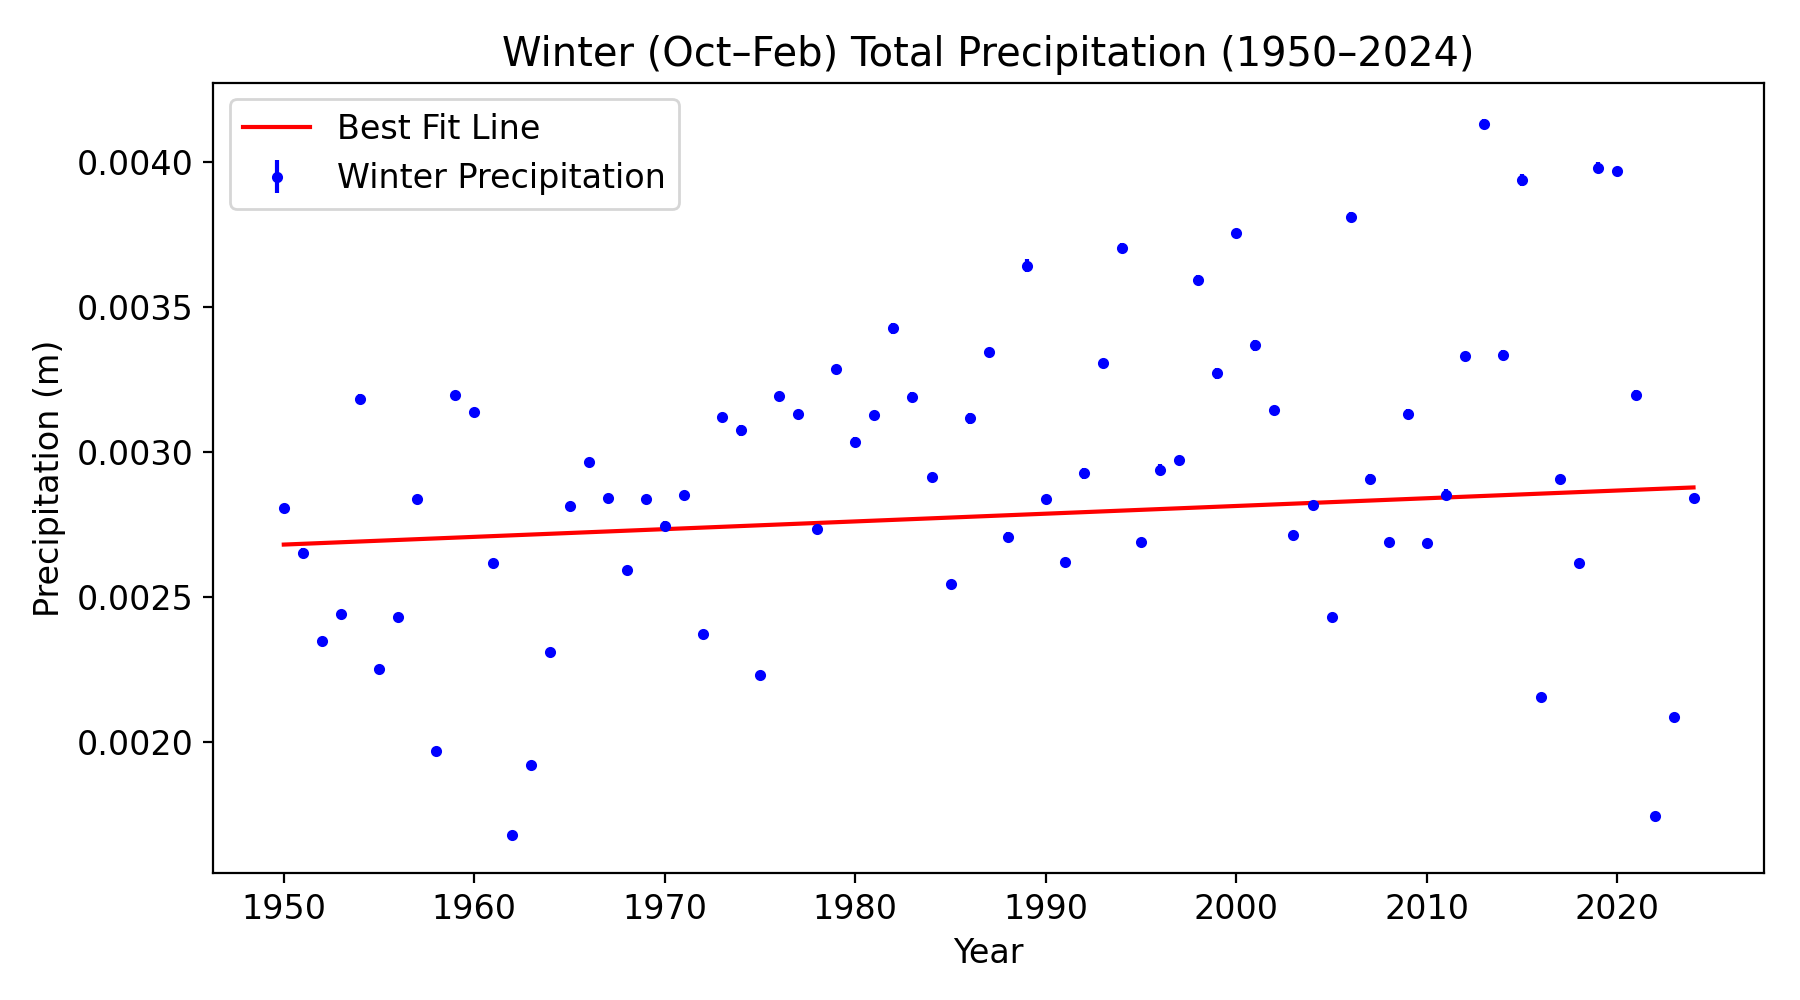

Slope: 2.66132e-06 ± 6.82123e-08 m/year
Oct 2023 – Feb 2024 average total precipitation: 2.09 mm


In [135]:
from scipy.optimize import curve_fit

data = xr.open_dataset(r"/Users/anvijoy/Desktop/Anvi/Uni Notes/Internal Placement/data_stream-moda-2.nc")

tp_data = data.tp  
time_values = data.valid_time.values 

months = np.array([(t.astype('datetime64[M]').item().month) for t in time_values])
years = np.array([t.astype('datetime64[Y]').astype(int) + 1970 for t in time_values])

winter_years = []
winter_means = []
winter_stds = []

for year in range(1950, 2025): 
    mask = ((years == year) & (months == 10)) | \
           ((years == year) & (months == 11)) | \
           ((years == year) & (months == 12)) | \
           ((years == year + 1) & (months <= 2))

    if np.sum(mask) == 5:  
        tp_winter = tp_data.isel(valid_time=np.where(mask)[0])
        mean_val = tp_winter.mean(dim=("valid_time", "latitude", "longitude"), skipna=True).values
        std_val = tp_winter.std(dim=("valid_time", "latitude", "longitude"), skipna=True).values
        n_grid = tp_winter.sizes["latitude"] * tp_winter.sizes["longitude"]
        error = std_val / np.sqrt(n_grid)

        winter_years.append(year)
        winter_means.append(mean_val)
        winter_stds.append(error)

winter_years = np.array(winter_years)
winter_means = np.array(winter_means)
winter_stds = np.array(winter_stds)

def linear_model(x, m, b):
    return m * x + b

popt, pcov = curve_fit(linear_model, winter_years, winter_means, sigma=winter_stds, absolute_sigma=True)
slope, intercept = popt
slope_err = np.sqrt(pcov[0, 0])

plt.figure(figsize=(9, 5))
plt.errorbar(winter_years, winter_means, yerr=winter_stds, fmt='.', color='b', label='Winter Precipitation')
plt.plot(winter_years, linear_model(winter_years, *popt), 'r-', label='Best Fit Line')
plt.xlabel('Year')
plt.ylabel('Precipitation (m)')
plt.title('Winter (Oct–Feb) Total Precipitation (1950–2024)')
plt.legend()
plt.tight_layout()
plt.show()


print(f"Slope: {slope:.5e} ± {slope_err:.5e} m/year")


mask_2023 = ((years == 2023) & (months == 10)) | \
            ((years == 2023) & (months == 11)) | \
            ((years == 2023) & (months == 12)) | \
            ((years == 2024) & (months <= 2))

if np.sum(mask_2023) == 5:
    tp_winter_2023 = tp_data.isel(valid_time=np.where(mask_2023)[0])
    tp_mean_m = tp_winter_2023.mean(dim=("valid_time", "latitude", "longitude"), skipna=True).values
    tp_mean_mm = tp_mean_m * 1000  
    print(f"Oct 2023 – Feb 2024 average total precipitation: {tp_mean_mm:.2f} mm")
else:
    print("Winter 2023–24 data is incomplete.")


## 